In [1]:
from utils.utils import *

structures_path = "1.Minimal_structures/Minimal_structures"

Cif.path = structures_path
Cif.original_cifs_path = "/home/fnerin/Desktop/allodb_new/src/data" # <pdb>_updated.cif.gz

# Data

In [2]:
clustersf = "2.Clustering/mmseqs2/clusters.pkl"

with open(clustersf, "rb") as f:
    clusters = pickle.load(f)

clusters

old_cluster_id old_cluster_rep cluster_rep    member  cluster_id   pdb
0                  0        5s4x_1_A    6ta3_3_C  5s4x_1_A           0  6ta3
1                  0        5s4x_1_A    6ta3_3_C  5s4x_2_B           0  6ta3
2                  0        5s4x_1_A    6ta3_3_C  5s4t_2_B           0  6ta3
3                  0        5s4x_1_A    6ta3_3_C  5s4s_1_A           0  6ta3
4                  0        5s4x_1_A    6ta3_3_C  5s4s_2_B           0  6ta3
...              ...             ...         ...       ...         ...   ...
3513             448        8fe1_2_E    8fe1_2_E  8fe1_1_B         427  8fe1
3514             448        8fe1_2_E    8fe1_2_E  8fe1_1_C         427  8fe1
3515             449        4op0_1_A    4op0_1_A  4op0_1_A         428  4op0
3516             450        2be9_2_B    2be9_2_B  2be9_2_B         429  2be9
3517             451        3d2p_1_A    3d2p_1_A  3d2p_1_A         430  3d2p

[3518 rows x 6 columns]

In [3]:
representatives = clusters.pdb.unique().tolist()

len(representatives), representatives

(431,
 ['6ta3',
  '5kwj',
  '6t4k',
  '5mo6',
  '3o0n',
  '1tjp',
  '2nw8',
  '4bqh',
  '1og0',
  '3s8b',
  '6ncf',
  '5jv1',
  '3auy',
  '5dl1',
  '7bhu',
  '1qqb',
  '2p5m',
  '6hgj',
  '4aau',
  '4cff',
  '7juv',
  '4mbs',
  '6nzf',
  '3zkr',
  '5uyy',
  '5xez',
  '2b08',
  '2c2b',
  '1raf',
  '5mfv',
  '2xje',
  '3i0s',
  '4dpq',
  '2d5x',
  '7amj',
  '2qmx',
  '3e5u',
  '6q4k',
  '4bo1',
  '6mo1',
  '2him',
  '2poc',
  '5ja7',
  '6rkw',
  '5aa4',
  '4yw8',
  '5fts',
  '5h08',
  '5olk',
  '3kq7',
  '2qei',
  '8jii',
  '3u18',
  '5y66',
  '6pgr',
  '2ha2',
  '5dzh',
  '7anw',
  '6kx3',
  '6e5g',
  '4pcu',
  '6bky',
  '1hak',
  '6gfm',
  '4ejl',
  '5lu8',
  '1fx2',
  '6fmz',
  '5f2e',
  '1o0s',
  '5w40',
  '6r4d',
  '7ehm',
  '6o0h',
  '4a79',
  '3dc2',
  '6ueg',
  '3kh5',
  '6u26',
  '8hnn',
  '5ngz',
  '7mew',
  '5m1a',
  '3nwy',
  '4q0a',
  '3rhw',
  '3smq',
  '5hue',
  '4lrl',
  '5urj',
  '7ofu',
  '6huj',
  '1hkb',
  '2ldb',
  '2cdq',
  '5lvx',
  '2dz9',
  '1njj',
  '3la2',
  '1

In [4]:
sitesf = "1.Minimal_structures/sites.pkl"

with open(sitesf, "rb") as f:
    sites = {k: v for k, v in pickle.load(f).items() if k in representatives}

sites

{'5c2o': {130: {'mod':   label_comp_id label_asym_id label_entity_id label_seq_id pdbx_PDB_ins_code  \
   0           TTP             F               4            .                 ?   
   
     auth_seq_id auth_comp_id auth_asym_id pdbx_PDB_model_num pdbx_label_index  \
   0         704          TTP            A                  1              704   
   
     pdbx_sifts_xref_db_name pdbx_sifts_xref_db_acc pdbx_sifts_xref_db_num  \
   0                       ?                      ?                      ?   
   
     pdbx_sifts_xref_db_res  
   0                      ?  ,
   'site':    label_comp_id label_asym_id label_entity_id label_seq_id pdbx_PDB_ins_code  \
   0            ALA             A               1          106                 ?   
   1            ALA             A               1          110                 ?   
   2            ALA             A               1           75                 ?   
   3            ALA             A               1           83               

# Pockets

In [5]:
os.makedirs("3.Pockets", exist_ok=True)

## FPocket

# TO DELETE

In [6]:
fpocket_path = "3.Pockets/fpocket"
fpocket_pockets_path = f"{fpocket_path}/pockets"
os.makedirs(fpocket_path, exist_ok=True)
os.makedirs(fpocket_pockets_path, exist_ok=True)

In [16]:
def hunt_pockets(pdb):    
    path = f"{fpocket_pockets_path}/{pdb}"
    if os.path.isdir(path):
        return
    else:
        print(pdb)
        os.makedirs(path, exist_ok=True)
        os.system(f"cp {structures_path}/{pdb}.cif {path}/")
        os.system(f"utils/external/fpocket/bin/fpocket --file {path}/{pdb}.cif")

In [12]:
for pdb in tqdm(representatives, smoothing=0):
    hunt_pockets(pdb)

  0%|          | 0/483 [00:00<?, ?it/s]

6ta3
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5kwj
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6t4k
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5mo6
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3o0n
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1tjp
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2nw8
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4bqh
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1og0
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3s8b
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6ncf
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3bay
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5jv1
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3auy
***** POCKET HUNTING BEGINS ***** 
***** POCKE

QH7073 qhull warning: instead of 4664 3-dimensional points, input contains
2358 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 2358 points.


***** POCKET HUNTING ENDS ***** 
3zqh
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2qmx
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3e5u
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6q4k
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4bo1
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6mo1
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2him
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2poc
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5ja7
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5lhn
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6rkw
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5aa4
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 6623 3-dimensional points, input contains
3349 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 3349 points.


***** POCKET HUNTING ENDS ***** 
4yw8
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5fts
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5h08
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5olk
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3kq7
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2qei
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
8jii
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3u18
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5y66
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6pgr
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2ha2
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5dzh
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7anw
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6kx3
***** POCKET 

QH7073 qhull warning: instead of 3387 3-dimensional points, input contains
1713 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 1713 points.


***** POCKET HUNTING ENDS ***** 
4pcu
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6bky
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1hak
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6gfm
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4ejl
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5lu8
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1fx2
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6fmz
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 9024 3-dimensional points, input contains
4503 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 4503 points.


***** POCKET HUNTING ENDS ***** 
5f2e
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1o0s
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5w40
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6r4d
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7ehm
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6o0h
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4a79
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3dc2
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6ueg
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3kh5
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6u26
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
8hnn
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5ngz
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7mew
***** POCKET 

QH7073 qhull warning: instead of 3086 3-dimensional points, input contains
1557 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 1557 points.


***** POCKET HUNTING ENDS ***** 
5m1a
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3nwy
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4q0a
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3rhw
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3smq
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4gx1
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6htf
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5hue
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4lrl
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5urj
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7ofu
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6i2p
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6huj
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1hkb
***** POCKET 

QH7073 qhull warning: instead of 5192 3-dimensional points, input contains
2558 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 2558 points.


***** POCKET HUNTING ENDS ***** 
3la2
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1uxq
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1vst
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4mdk
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6bvn
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4m1p
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1jlr
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5fii
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4bxc
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5ifu
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4fxo
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7ljc
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2jfz
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6o0n
***** POCKET 

QH7073 qhull warning: instead of 1941 3-dimensional points, input contains
951 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 951 points.


***** POCKET HUNTING ENDS ***** 
6w6d
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4dn0
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6dhm
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3hv8
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5on7
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5hot
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1ig5
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5llm
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3kjn
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6shq
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 13276 3-dimensional points, input contains
6728 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 6728 points.


***** POCKET HUNTING ENDS ***** 
4coj
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2k31
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 2308 3-dimensional points, input contains
1168 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 1168 points.


***** POCKET HUNTING ENDS ***** 
5tkb
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6imx
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5mro
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6i5g
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2bu6
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4zsk
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5x33
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1nh8
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5m0s
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6f7i
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5yve
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6usa
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2vk1
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1t34
***** POCKET 

QH7073 qhull warning: instead of 3024 3-dimensional points, input contains
1527 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 1527 points.


***** POCKET HUNTING ENDS ***** 
5wsb
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
8v8c
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 12114 3-dimensional points, input contains
6085 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 6085 points.


***** POCKET HUNTING ENDS ***** 
2ylq
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1m8p
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6zgv
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6tpk
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4z6a
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 5059 3-dimensional points, input contains
2646 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 2646 points.


***** POCKET HUNTING ENDS ***** 
5we8
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4nir
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1tb6
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3e3i
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6jta
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6qu3
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6c98
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3fhz
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2vd3
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1w25
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4fgt
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1q43
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3x1m
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4wlw
***** POCKET 

QH7073 qhull warning: instead of 2870 3-dimensional points, input contains
1417 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 1417 points.


***** POCKET HUNTING ENDS ***** 
6vwp
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 6403 3-dimensional points, input contains
3419 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 3419 points.


***** POCKET HUNTING ENDS ***** 
2zb2
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1msv
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1yp2
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1bo5
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3uvv
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7lgu
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6mc1
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5zwj
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5npk
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2p9g
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4b6e
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5f91
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6w30
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6z89
***** POCKET 

QH7073 qhull warning: instead of 5226 3-dimensional points, input contains
2575 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 2575 points.


***** POCKET HUNTING ENDS ***** 
4ofg
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5y8t
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7cr7
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1peo
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2bxg
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7lz4
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6qxl
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4kga
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7c7q
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6kun
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7dtt
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7lmy
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
8jpf
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6s2t
***** POCKET 

QH7073 qhull warning: instead of 2480 3-dimensional points, input contains
1270 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 1270 points.


***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6kkb
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5lrs
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 3840 3-dimensional points, input contains
1920 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 1920 points.


***** POCKET HUNTING ENDS ***** 
4q9o
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2bty
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2fhy
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5k8t
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5l7i
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5kde
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3gnw
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7d7f
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3fud
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4wf2
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 4768 3-dimensional points, input contains
2352 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 2352 points.


***** POCKET HUNTING ENDS ***** 
3wgg
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4zji
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3b1t
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3cev
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3ho6
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 3874 3-dimensional points, input contains
1948 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 1948 points.


***** POCKET HUNTING ENDS ***** 
5xzr
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6w2j
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5nzk
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2vvt
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7dpt
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3tho
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5wmv
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6cjx
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5y2f
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5cus
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1bj4
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5nn4
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1vea
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7aia
***** POCKET 

QH7073 qhull warning: instead of 4654 3-dimensional points, input contains
2372 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 2372 points.


***** POCKET HUNTING ENDS ***** 
3hl8
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 7323 3-dimensional points, input contains
3704 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 3704 points.


***** POCKET HUNTING ENDS ***** 
6ku3
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 4797 3-dimensional points, input contains
4794 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 4794 points.


***** POCKET HUNTING ENDS ***** 
5o03
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6iil
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3blw
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5klq
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3d2e
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5oyj
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1zxm
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6e3u
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6yd5
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 4452 3-dimensional points, input contains
2215 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 2215 points.


***** POCKET HUNTING ENDS ***** 
5osb
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5f1u
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4z61
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1l5g
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4w9n
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 9287 3-dimensional points, input contains
4804 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 4804 points.


***** POCKET HUNTING ENDS ***** 
5w6y
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4nes
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5wj6
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3i59
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6eg3
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6boz
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4z87
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 14878 3-dimensional points, input contains
7531 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 7531 points.


***** POCKET HUNTING ENDS ***** 
5ndz
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5crl
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6d7o
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1r1v
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5k1c
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6nbl
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5kqd
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1fap
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 2017 3-dimensional points, input contains
1639 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 1639 points.


***** POCKET HUNTING ENDS ***** 
3uqd
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1egy
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4g9c
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6thc
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6swx
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5icn
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2y0p
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4c8b
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4jn4
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6wkn
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2iub
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1tbf
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4p02
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6pwh
***** POCKET 

QH7073 qhull warning: instead of 11355 3-dimensional points, input contains
5679 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 5679 points.


***** POCKET HUNTING ENDS ***** 
6zod
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3zg1
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5z46
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5x9u
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4rzt
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6dja
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5nj3
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1t5a
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6yuh
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7ld3
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4o3u
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3otu
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4aqh
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6g1b
***** POCKET 

QH7073 qhull warning: instead of 17796 3-dimensional points, input contains
13899 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 13899 points.


***** POCKET HUNTING ENDS ***** 
1kmp
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6s8f
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1rd4
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6xnv
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4kzt
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3zou
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5in4
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6hho
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1um8
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1fcj
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4qpl
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6xp9
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6x9h
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5n9t
***** POCKET 

QH7073 qhull warning: instead of 3828 3-dimensional points, input contains
1943 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 1943 points.


***** POCKET HUNTING ENDS ***** 
2be9
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3d2p
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 


Despite a lot of qhull warnings, the output for those PDBs is generated and the distribution of pockets throughout the structure seems normal.

<br>

### FPocket utils

In [7]:
from utils.pocket_utils import Pocket, get_pocket_view, get_pockets_info

In [8]:
view_pocket = lambda pdb, pocket: get_pocket_view(
    pdb = pdb, 
    cif = Cif(pdb),
    pocket = pocket,
    pockets_path = fpocket_pockets_path,
    sites = [
        s
        for orig_s in sites[pdb].values()
        for s in orig_s["equivalent"] + [{"mod": orig_s["mod"], "site": orig_s["site"]}]
    ]
)

### Process

In [9]:
# Number of residues forming the pocket, and pocket-allosteric site overlap percentages
## site_in_pocket: % of residues of the site that are part of the pocket (% with the site of the PDB that gives the maximum %, comparing all sites of the PDB with the pocket)
## pocket_in_site: % of residues of the pocket that are part of the allosetric site (% with the site of the PDBthat gives the maximum %)

pockets = pd.DataFrame((
    pocket
    for pdb in tqdm(representatives, smoothing=0)
    for pocket in get_pockets_info(
        Cif(pdb), 
        sites = tuple(
            s
            for orig_s in sites[pdb].values()
            for s in orig_s["equivalent"] + [orig_s,]
        ),
        pockets_path = fpocket_pockets_path
    )
))

pockets

  0%|          | 0/431 [00:00<?, ?it/s]

pdb    pocket  nres  site_in_pocket  pocket_in_site
0      6ta3  pocket16    11        0.000000        0.000000
1      6ta3  pocket28     7        0.000000        0.000000
2      6ta3  pocket18     8        0.000000        0.000000
3      6ta3  pocket11    10        0.074074        0.200000
4      6ta3  pocket34     7        0.000000        0.000000
...     ...       ...   ...             ...             ...
14732  3d2p   pocket3    28        0.000000        0.000000
14733  3d2p  pocket12     7        0.130435        0.428571
14734  3d2p  pocket19    11        0.000000        0.000000
14735  3d2p  pocket21    15        0.043478        0.066667
14736  3d2p   pocket6     8        0.000000        0.000000

[14737 rows x 5 columns]

In [28]:
len(representatives), len(pockets.pdb.unique())

(431, 431)

### Pocket size

In [29]:
pockets.sort_values("nres", ascending=False)

pdb     pocket  nres  site_in_pocket  pocket_in_site  max_overlap  \
11227  6s8f  pocket246   156        0.000000        0.000000     0.000000   
12065  5iov  pocket121   139        0.000000        0.000000     0.000000   
11161  6s8f  pocket245    98        0.000000        0.000000     0.000000   
3789   5swo  pocket106    98        0.916667        0.112245     0.916667   
10563  6zod    pocket2    94        0.080000        0.021277     0.080000   
...     ...        ...   ...             ...             ...          ...   
1723   5y66   pocket24     3        0.000000        0.000000     0.000000   
13234  6np0   pocket31     3        0.000000        0.000000     0.000000   
13251  6np0   pocket29     3        0.000000        0.000000     0.000000   
1398   6rkw   pocket58     3        0.000000        0.000000     0.000000   
11416  6hho   pocket10     2        0.000000        0.000000     0.000000   

       mean_overlap  
11227      0.000000  
12065      0.000000  
11161      0.000000  
3789       0.514456  
10563      0.050638  
...             ...  
1723       0.000000  
13234      0.000000  
13251      0.000000  
1398       0.000000  
11416      0.000000  

[14737 rows x 7 columns]

array([[<Axes: title={'center': 'nres'}>]], dtype=object)

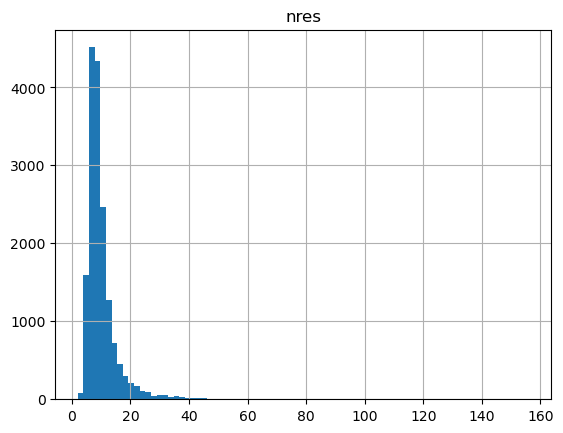

In [19]:
pockets.nres.hist(bins=80)

##### Big pockets

In [96]:
v, colors, sites_colors = view_pocket(*"6s8f	pocket246".split())
v

Viz(bg_color='#F7F7F7', color_data={'data': [{'color': 'white'}], 'nonSelectedColor': None, 'keepColors': Fals…

In [97]:
v.color(colors, keep_colors=True, keep_representations=True)
v.color_residues(sites_colors)

This structure has a good chunk of UNK residues at the beginning of the sequence that aren't rendered correctly by the visualizer and also might've interfered in the FPocket algorithm. In this case, these UNK residues in the structure have the atoms of alanines, but might leave plenty of empty spaces.

<br>

In [100]:
v, colors, sites_colors = view_pocket(*"5iov	pocket121".split())
v

Viz(bg_color='#F7F7F7', color_data={'data': [{'color': 'white'}], 'nonSelectedColor': None, 'keepColors': Fals…

In [101]:
v.color(colors, keep_colors=True, keep_representations=True)
v.color_residues(sites_colors)

In this case the structure looks correct and the pocket is simply very big.

<br>

In [102]:
v, colors, sites_colors = view_pocket(*"5swo	pocket106".split())
v

Viz(bg_color='#F7F7F7', color_data={'data': [{'color': 'white'}], 'nonSelectedColor': None, 'keepColors': Fals…

In [103]:
v.color(colors, keep_colors=True, keep_representations=True)
v.color_residues(sites_colors)

In this case the structure looks correct and the pocket is simply very big.

<br>

##### Small pockets

In [104]:
v, colors, sites_colors = view_pocket(*"6hho	pocket10".split())
v

Viz(bg_color='#F7F7F7', color_data={'data': [{'color': 'white'}], 'nonSelectedColor': None, 'keepColors': Fals…

In [105]:
v.color(colors, keep_colors=True, keep_representations=True)
v.color_residues(sites_colors)

Very small pocket found in the structure.

<br>

#### Outliers

Further than 3 STDs.

<Axes: >

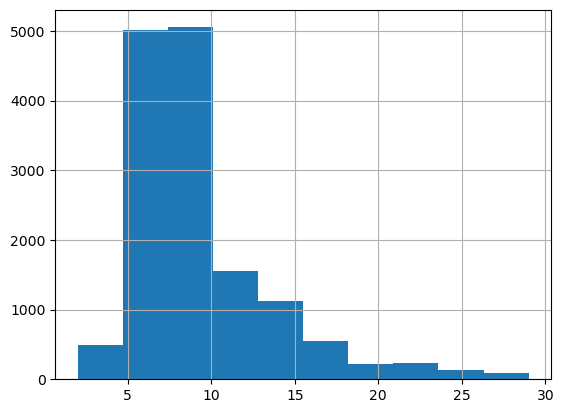

In [30]:
import numpy as np

mean = pockets["nres"].mean()
std = pockets["nres"].std()
filt = pockets[np.abs(pockets["nres"] - mean) / std < 3]
filt.nres.hist()

In [31]:
filt.sort_values("nres")

pdb    pocket  nres  site_in_pocket  pocket_in_site  max_overlap  \
11416  6hho  pocket10     2        0.000000        0.000000     0.000000   
12342  6hv0  pocket25     3        0.000000        0.000000     0.000000   
13234  6np0  pocket31     3        0.000000        0.000000     0.000000   
7523   5lrs  pocket15     3        0.000000        0.000000     0.000000   
1723   5y66  pocket24     3        0.000000        0.000000     0.000000   
...     ...       ...   ...             ...             ...          ...   
6646   7cr7  pocket55    29        0.000000        0.000000     0.000000   
5881   3x1m  pocket18    29        0.617647        0.724138     0.724138   
721    6nzf   pocket3    29        0.793103        0.793103     0.793103   
13408  2j0x   pocket6    29        0.086957        0.068966     0.086957   
7784   3wgg  pocket37    29        0.000000        0.000000     0.000000   

       mean_overlap  
11416      0.000000  
12342      0.000000  
13234      0.000000  
7523       0.000000  
1723       0.000000  
...             ...  
6646       0.000000  
5881       0.670892  
721        0.793103  
13408      0.077961  
7784       0.000000  

[14451 rows x 7 columns]

### Overlap

array([[<Axes: title={'center': 'site_in_pocket'}>,
        <Axes: title={'center': 'pocket_in_site'}>]], dtype=object)

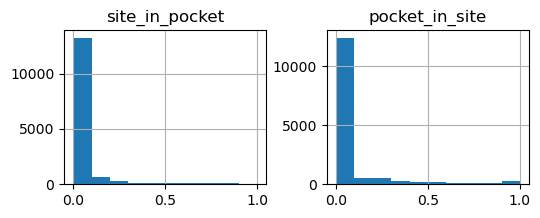

In [13]:
pockets.drop(columns="nres").hist(figsize=(6,2))

array([[<Axes: title={'center': 'site_in_pocket'}>,
        <Axes: title={'center': 'pocket_in_site'}>]], dtype=object)

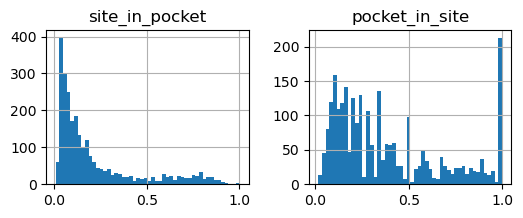

In [17]:
# Distributions without 0 values
pockets.loc[lambda x: x[['site_in_pocket', 'pocket_in_site']].sum(axis=1) != 0].drop(columns="nres").hist(bins=50, figsize=(6,2))

### Labelling

We label as positive pockets ("allosteric" pockets) those that contain 65% or more of the residues of the site in them (site_in_pocket >= 0.65), to represent pockets that overlap considerably with a single site each, and capture most of its extension.

In [18]:
pockets.loc[
    pockets.loc[
        lambda x: (x["site_in_pocket"] >= 0.65)
    ].index, 
    "label"
] = 1
pockets["label"] = pockets["label"].fillna(0).astype(int)

pockets

pdb    pocket  nres  site_in_pocket  pocket_in_site  label
0      6ta3  pocket16    11        0.000000        0.000000      0
1      6ta3  pocket28     7        0.000000        0.000000      0
2      6ta3  pocket18     8        0.000000        0.000000      0
3      6ta3  pocket11    10        0.074074        0.200000      0
4      6ta3  pocket34     7        0.000000        0.000000      0
...     ...       ...   ...             ...             ...    ...
14732  3d2p   pocket3    28        0.000000        0.000000      0
14733  3d2p  pocket12     7        0.130435        0.428571      0
14734  3d2p  pocket19    11        0.000000        0.000000      0
14735  3d2p  pocket21    15        0.043478        0.066667      0
14736  3d2p   pocket6     8        0.000000        0.000000      0

[14737 rows x 6 columns]

In [24]:
dropped = set(pockets.pdb.unique()) - set(pockets.loc[pockets.label == 1].pdb.unique())

print("Total initial PDBs, final PDBs, dropped PDBs, % of PDBs dropped, and list of dropped PDBs")
len(pockets.pdb.unique()), len(pockets.loc[pockets.label == 1].pdb.unique()), len(dropped), len(dropped)/len(pockets.pdb.unique()), dropped

Total initial PDBs, final PDBs, dropped PDBs, % of PDBs dropped, and list of dropped PDBs


(431,
 229,
 202,
 0.46867749419953597,
 {'11bg',
  '1bo5',
  '1fap',
  '1fx2',
  '1h78',
  '1h9g',
  '1hak',
  '1m8p',
  '1mc0',
  '1msv',
  '1nh8',
  '1njj',
  '1o0s',
  '1og0',
  '1owb',
  '1peo',
  '1qw7',
  '1raf',
  '1tbf',
  '1um8',
  '1uxq',
  '1vea',
  '1w0f',
  '1w25',
  '1w96',
  '1ygc',
  '2be9',
  '2csm',
  '2dz9',
  '2fhy',
  '2fqq',
  '2him',
  '2jfn',
  '2k31',
  '2nw8',
  '2o8e',
  '2p5m',
  '2poc',
  '2rde',
  '2vd3',
  '2vd4',
  '2vk1',
  '2vvt',
  '2xje',
  '2y0p',
  '2zb2',
  '3ath',
  '3auy',
  '3blw',
  '3d2p',
  '3dc2',
  '3etl',
  '3f9n',
  '3fhz',
  '3fzy',
  '3gnw',
  '3hl8',
  '3ho6',
  '3ho8',
  '3hv8',
  '3la2',
  '3otu',
  '3prj',
  '3qku',
  '3rhw',
  '3tho',
  '3tuv',
  '3u18',
  '3zkr',
  '3zm9',
  '4bo1',
  '4bqh',
  '4bxc',
  '4dn0',
  '4ejl',
  '4fkz',
  '4jn4',
  '4lrl',
  '4mbs',
  '4nir',
  '4oir',
  '4op0',
  '4p02',
  '4p2t',
  '4p86',
  '4q0a',
  '4q9o',
  '4qpl',
  '4r1r',
  '4tme',
  '4tqb',
  '4w9n',
  '4wf2',
  '4xcz',
  '4xnv',
  '4yw8',


In [25]:
print("Total initial pockets, final pockets, positive pockets, and ratio of positive pockets")
len(pockets), len(pockets.query(f"pdb not in {list(dropped)}")), sum(pockets.label == 1), sum(pockets.label == 1)/len(pockets.query(f"pdb not in {list(dropped)}"))

Total initial pockets, final pockets, positive pockets, and ratio of positive pockets


(14737, 8049, 258, 0.032053671263511)

FPocket fails to identify at least a considerably overlapping pocket with the allosteric site(s) for almost half of the PDBs. The final % of positive pockets is ~3% of total remaining pockets.

<br>

In [27]:
final_pockets = pockets.query(f"pdb not in {list(dropped)}")

### Features

Obtaining the FPocket-calculated descriptors of the pockets.

In [29]:
pockets_features = pd.concat(
    (
        final_pockets,
        final_pockets.apply(
            lambda row: pd.Series(
                Pocket(f"{fpocket_pockets_path}/{row['pdb']}/{row['pdb']}_out/pockets/{row['pocket']}_atm.cif").feats
            ), axis=1
        )
    ),
    axis=1
)

pockets_features

pdb    pocket  nres  site_in_pocket  pocket_in_site  label  \
0      6ta3  pocket16    11        0.000000             0.0      0   
1      6ta3  pocket28     7        0.000000             0.0      0   
2      6ta3  pocket18     8        0.000000             0.0      0   
3      6ta3  pocket11    10        0.074074             0.2      0   
4      6ta3  pocket34     7        0.000000             0.0      0   
...     ...       ...   ...             ...             ...    ...   
14681  8fe1  pocket63    10        0.444444             0.8      0   
14682  8fe1  pocket41     5        0.172414             1.0      0   
14683  8fe1   pocket6     8        0.000000             0.0      0   
14684  8fe1  pocket79     8        0.000000             0.0      0   
14685  8fe1  pocket89     8        0.000000             0.0      0   

       Pocket Score  Drug Score  Number of alpha spheres  \
0           -0.0151      0.0017                     25.0   
1           -0.0642      0.0020                     20.0   
2           -0.0260      0.0003                     20.0   
3            0.0053      0.0023                     23.0   
4           -0.1085      0.0004                     16.0   
...             ...         ...                      ...   
14681       -0.0926      0.0014                     34.0   
14682       -0.0417      0.0045                     15.0   
14683        0.0864      0.0275                     29.0   
14684       -0.1088      0.0081                     24.0   
14685       -0.1364      0.0001                     22.0   

       Mean alpha-sphere radius  ...  Local hydrophobic density Score  \
0                        3.8873  ...                          16.0000   
1                        3.7323  ...                          18.0000   
2                        4.0138  ...                           1.0000   
3                        3.7335  ...                          17.0000   
4                        3.6368  ...                           7.0000   
...                         ...  ...                              ...   
14681                    3.8709  ...                           3.6667   
14682                    4.1534  ...                          11.0000   
14683                    3.7403  ...                          25.0000   
14684                    4.0704  ...                          14.8235   
14685                    4.0015  ...                           2.0000   

       Number of apolar alpha sphere  Proportion of apolar alpha sphere  \
0                               17.0                             0.6800   
1                               19.0                             0.9500   
2                                2.0                             0.1000   
3                               18.0                             0.7826   
4                                8.0                             0.5000   
...                              ...                                ...   
14681                            6.0                             0.1765   
14682                           12.0                             0.8000   
14683                           26.0                             0.8966   
14684                           17.0                             0.7083   
14685                            3.0                             0.1364   

       Total SASA  Polar SASA  Apolar SASA  Proportion of polar atoms  \
0          96.797      34.574       62.222                     39.130   
1          56.214       4.286       51.928                     17.647   
2          99.053      53.816       45.236                     52.381   
3          44.664       9.643       35.021                     27.778   
4          73.739      53.210       20.530                     42.857   
...           ...         ...          ...                        ...   
14681     138.612      44.417       94.195                     36.667   
14682      58.765       3.214       55.551                     21.429   
14683      

In [30]:
pockets_features.to_pickle(f"{fpocket_path}/pockets.pkl")

## "Old" FPocket

Using the parameters of the minimum and maximum alpha sphere radius, and minimum number of alpha spheres in a pocket, to the original values presented in the seminal FPocket publication: 3 Å, 6 Å, and 35 spheres, respectively (https://github.com/Discngine/fpocket/issues/62). 

In [6]:
old_fpocket_path = "3.Pockets/old_fpocket"
old_fpocket_pockets_path = f"{old_fpocket_path}/pockets"
os.makedirs(old_fpocket_path, exist_ok=True)
os.makedirs(old_fpocket_pockets_path, exist_ok=True)

In [16]:
def hunt_pockets(pdb):    
    path = f"{fpocket_pockets_path}/{pdb}"
    if os.path.isdir(path):
        return
    else:
        print(pdb)
        os.makedirs(path, exist_ok=True)
        os.system(f"cp {structures_path}/{pdb}.cif {path}/")
        os.system(f"utils/external/fpocket/bin/fpocket -m 3 -M 6 -i 35 --file {path}/{pdb}.cif")

In [12]:
for pdb in tqdm(representatives, smoothing=0):
    hunt_pockets(pdb)

  0%|          | 0/483 [00:00<?, ?it/s]

6ta3
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5kwj
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6t4k
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5mo6
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3o0n
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1tjp
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2nw8
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4bqh
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1og0
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3s8b
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6ncf
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3bay
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5jv1
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3auy
***** POCKET HUNTING BEGINS ***** 
***** POCKE

QH7073 qhull warning: instead of 4664 3-dimensional points, input contains
2358 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 2358 points.


***** POCKET HUNTING ENDS ***** 
3zqh
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2qmx
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3e5u
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6q4k
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4bo1
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6mo1
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2him
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2poc
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5ja7
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5lhn
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6rkw
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5aa4
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 6623 3-dimensional points, input contains
3349 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 3349 points.


***** POCKET HUNTING ENDS ***** 
4yw8
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5fts
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5h08
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5olk
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3kq7
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2qei
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
8jii
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3u18
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5y66
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6pgr
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2ha2
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5dzh
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7anw
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6kx3
***** POCKET 

QH7073 qhull warning: instead of 3387 3-dimensional points, input contains
1713 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 1713 points.


***** POCKET HUNTING ENDS ***** 
4pcu
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6bky
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1hak
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6gfm
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4ejl
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5lu8
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1fx2
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6fmz
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 9024 3-dimensional points, input contains
4503 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 4503 points.


***** POCKET HUNTING ENDS ***** 
5f2e
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1o0s
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5w40
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6r4d
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7ehm
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6o0h
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4a79
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3dc2
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6ueg
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3kh5
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6u26
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
8hnn
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5ngz
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7mew
***** POCKET 

QH7073 qhull warning: instead of 3086 3-dimensional points, input contains
1557 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 1557 points.


***** POCKET HUNTING ENDS ***** 
5m1a
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3nwy
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4q0a
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3rhw
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3smq
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4gx1
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6htf
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5hue
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4lrl
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5urj
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7ofu
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6i2p
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6huj
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1hkb
***** POCKET 

QH7073 qhull warning: instead of 5192 3-dimensional points, input contains
2558 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 2558 points.


***** POCKET HUNTING ENDS ***** 
3la2
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1uxq
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1vst
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4mdk
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6bvn
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4m1p
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1jlr
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5fii
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4bxc
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5ifu
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4fxo
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7ljc
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2jfz
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6o0n
***** POCKET 

QH7073 qhull warning: instead of 1941 3-dimensional points, input contains
951 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 951 points.


***** POCKET HUNTING ENDS ***** 
6w6d
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4dn0
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6dhm
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3hv8
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5on7
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5hot
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1ig5
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5llm
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3kjn
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6shq
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 13276 3-dimensional points, input contains
6728 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 6728 points.


***** POCKET HUNTING ENDS ***** 
4coj
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2k31
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 2308 3-dimensional points, input contains
1168 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 1168 points.


***** POCKET HUNTING ENDS ***** 
5tkb
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6imx
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5mro
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6i5g
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2bu6
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4zsk
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5x33
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1nh8
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5m0s
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6f7i
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5yve
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6usa
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2vk1
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1t34
***** POCKET 

QH7073 qhull warning: instead of 3024 3-dimensional points, input contains
1527 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 1527 points.


***** POCKET HUNTING ENDS ***** 
5wsb
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
8v8c
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 12114 3-dimensional points, input contains
6085 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 6085 points.


***** POCKET HUNTING ENDS ***** 
2ylq
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1m8p
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6zgv
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6tpk
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4z6a
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 5059 3-dimensional points, input contains
2646 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 2646 points.


***** POCKET HUNTING ENDS ***** 
5we8
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4nir
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1tb6
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3e3i
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6jta
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6qu3
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6c98
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3fhz
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2vd3
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1w25
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4fgt
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1q43
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3x1m
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4wlw
***** POCKET 

QH7073 qhull warning: instead of 2870 3-dimensional points, input contains
1417 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 1417 points.


***** POCKET HUNTING ENDS ***** 
6vwp
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 6403 3-dimensional points, input contains
3419 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 3419 points.


***** POCKET HUNTING ENDS ***** 
2zb2
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1msv
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1yp2
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1bo5
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3uvv
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7lgu
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6mc1
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5zwj
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5npk
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2p9g
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4b6e
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5f91
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6w30
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6z89
***** POCKET 

QH7073 qhull warning: instead of 5226 3-dimensional points, input contains
2575 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 2575 points.


***** POCKET HUNTING ENDS ***** 
4ofg
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5y8t
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7cr7
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1peo
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2bxg
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7lz4
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6qxl
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4kga
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7c7q
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6kun
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7dtt
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7lmy
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
8jpf
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6s2t
***** POCKET 

QH7073 qhull warning: instead of 2480 3-dimensional points, input contains
1270 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 1270 points.


***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6kkb
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5lrs
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 3840 3-dimensional points, input contains
1920 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 1920 points.


***** POCKET HUNTING ENDS ***** 
4q9o
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2bty
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2fhy
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5k8t
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5l7i
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5kde
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3gnw
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7d7f
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3fud
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4wf2
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 4768 3-dimensional points, input contains
2352 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 2352 points.


***** POCKET HUNTING ENDS ***** 
3wgg
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4zji
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3b1t
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3cev
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3ho6
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 3874 3-dimensional points, input contains
1948 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 1948 points.


***** POCKET HUNTING ENDS ***** 
5xzr
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6w2j
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5nzk
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2vvt
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7dpt
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3tho
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5wmv
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6cjx
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5y2f
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5cus
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1bj4
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5nn4
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1vea
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7aia
***** POCKET 

QH7073 qhull warning: instead of 4654 3-dimensional points, input contains
2372 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 2372 points.


***** POCKET HUNTING ENDS ***** 
3hl8
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 7323 3-dimensional points, input contains
3704 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 3704 points.


***** POCKET HUNTING ENDS ***** 
6ku3
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 4797 3-dimensional points, input contains
4794 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 4794 points.


***** POCKET HUNTING ENDS ***** 
5o03
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6iil
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3blw
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5klq
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3d2e
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5oyj
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1zxm
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6e3u
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6yd5
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 4452 3-dimensional points, input contains
2215 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 2215 points.


***** POCKET HUNTING ENDS ***** 
5osb
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5f1u
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4z61
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1l5g
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4w9n
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 9287 3-dimensional points, input contains
4804 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 4804 points.


***** POCKET HUNTING ENDS ***** 
5w6y
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4nes
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5wj6
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3i59
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6eg3
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6boz
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4z87
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 14878 3-dimensional points, input contains
7531 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 7531 points.


***** POCKET HUNTING ENDS ***** 
5ndz
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5crl
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6d7o
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1r1v
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5k1c
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6nbl
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5kqd
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1fap
***** POCKET HUNTING BEGINS ***** 


QH7073 qhull warning: instead of 2017 3-dimensional points, input contains
1639 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 1639 points.


***** POCKET HUNTING ENDS ***** 
3uqd
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1egy
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4g9c
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6thc
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6swx
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5icn
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2y0p
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4c8b
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4jn4
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6wkn
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
2iub
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1tbf
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4p02
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6pwh
***** POCKET 

QH7073 qhull warning: instead of 11355 3-dimensional points, input contains
5679 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 5679 points.


***** POCKET HUNTING ENDS ***** 
6zod
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3zg1
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5z46
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5x9u
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4rzt
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6dja
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5nj3
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1t5a
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6yuh
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7ld3
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4o3u
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3otu
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4aqh
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6g1b
***** POCKET 

QH7073 qhull warning: instead of 17796 3-dimensional points, input contains
13899 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 13899 points.


***** POCKET HUNTING ENDS ***** 
1kmp
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6s8f
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1rd4
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6xnv
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4kzt
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3zou
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5in4
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6hho
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1um8
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
1fcj
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
4qpl
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6xp9
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
6x9h
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
5n9t
***** POCKET 

QH7073 qhull warning: instead of 3828 3-dimensional points, input contains
1943 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 1943 points.


***** POCKET HUNTING ENDS ***** 
2be9
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
3d2p
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 


Despite a lot of qhull warnings, the output for those PDBs is generated and the distribution of pockets throughout the structure seems normal.

<br>

### FPocket utils

In [33]:
view_pocket = lambda pdb, pocket: get_pocket_view(
    pdb = pdb, 
    cif = Cif(pdb),
    pocket = pocket,
    pockets_path = old_fpocket_pockets_path,
    sites = [
        s
        for orig_s in sites[pdb].values()
        for s in orig_s["equivalent"] + [{"mod": orig_s["mod"], "site": orig_s["site"]}]
    ]
)

### Process

In [34]:
# Number of residues forming the pocket, and pocket-allosteric site overlap percentages
## site_in_pocket: % of residues of the site that are part of the pocket (% with the site of the PDB that gives the maximum %, comparing all sites of the PDB with the pocket)
## pocket_in_site: % of residues of the pocket that are part of the allosetric site (% with the site of the PDBthat gives the maximum %)

pockets = pd.DataFrame((
    pocket
    for pdb in tqdm(representatives, smoothing=0)
    for pocket in get_pockets_info(
        Cif(pdb), 
        sites = tuple(
            s
            for orig_s in sites[pdb].values()
            for s in orig_s["equivalent"] + [orig_s,]
        ),
        pockets_path = old_fpocket_pockets_path
    )
))

pockets

  0%|          | 0/431 [00:00<?, ?it/s]

pdb    pocket  nres  site_in_pocket  pocket_in_site
0     6ta3  pocket16    12        0.000000          0.0000
1     6ta3  pocket18    13        0.000000          0.0000
2     6ta3  pocket11    16        0.000000          0.0000
3     6ta3  pocket15    11        0.000000          0.0000
4     6ta3   pocket7    42        0.000000          0.0000
...    ...       ...   ...             ...             ...
8136  3d2p   pocket5    11        0.000000          0.0000
8137  3d2p   pocket8    19        0.000000          0.0000
8138  3d2p   pocket3    17        0.000000          0.0000
8139  3d2p  pocket12     7        0.000000          0.0000
8140  3d2p   pocket6    16        0.043478          0.0625

[8141 rows x 5 columns]

In [35]:
len(representatives), len(pockets.pdb.unique())

(431, 431)

### Pocket size

In [36]:
pockets.sort_values("nres", ascending=False)

pdb     pocket  nres  site_in_pocket  pocket_in_site
6187  6s8f    pocket1   477             0.0        0.000000
6618  5iov    pocket1   477             1.0        0.050314
6076  5gug    pocket2   349             0.0        0.000000
6070  5gug    pocket1   278             0.0        0.000000
6623  5iov    pocket2   236             0.0        0.000000
...    ...        ...   ...             ...             ...
6625  5iov   pocket20     5             0.0        0.000000
7683  7aud   pocket17     5             0.0        0.000000
2689  6uec    pocket9     5             0.0        0.000000
6871  5vsw   pocket39     5             0.0        0.000000
6144  6s8f  pocket101     3             0.0        0.000000

[8141 rows x 5 columns]

<Axes: >

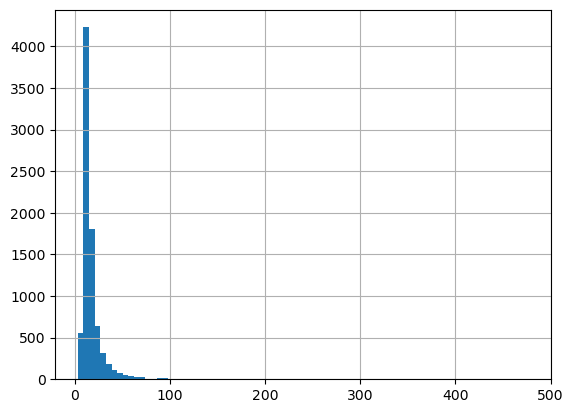

In [37]:
pockets.nres.hist(bins=80)

##### Big pockets

In [38]:
v, colors, sites_colors = view_pocket(*"6s8f	pocket1".split())
v

Viz(bg_color='#F7F7F7', color_data={'data': [{'color': 'white'}], 'nonSelectedColor': None, 'keepColors': Fals…

In [39]:
v.color(colors, keep_colors=True, keep_representations=True)
v.color_residues(sites_colors)

This structure has a good chunk of UNK residues at the beginning of the sequence that aren't rendered correctly by the visualizer and also might've interfered in the FPocket algorithm. In this case, these UNK residues in the structure have the atoms of alanines, but might leave plenty of empty spaces.

<br>

In [40]:
v, colors, sites_colors = view_pocket(*"5iov	pocket1".split())
v

Viz(bg_color='#F7F7F7', color_data={'data': [{'color': 'white'}], 'nonSelectedColor': None, 'keepColors': Fals…

In [41]:
v.color(colors, keep_colors=True, keep_representations=True)
v.color_residues(sites_colors)

In this case the structure looks correct and the pocket is simply very big.

<br>

In [42]:
v, colors, sites_colors = view_pocket(*"5gug	pocket2".split())
v

Viz(bg_color='#F7F7F7', color_data={'data': [{'color': 'white'}], 'nonSelectedColor': None, 'keepColors': Fals…

In [43]:
v.color(colors, keep_colors=True, keep_representations=True)
v.color_residues(sites_colors)

In this case the structure looks correct and the pocket is simply very big.

<br>

##### Small pockets

In [44]:
v, colors, sites_colors = view_pocket(*"6s8f	pocket101".split())
v

Viz(bg_color='#F7F7F7', color_data={'data': [{'color': 'white'}], 'nonSelectedColor': None, 'keepColors': Fals…

In [45]:
v.color(colors, keep_colors=True, keep_representations=True)
v.color_residues(sites_colors)

Very small pocket again in the weird structure.

<br>

#### Outliers

Further than 3 STDs.

<Axes: >

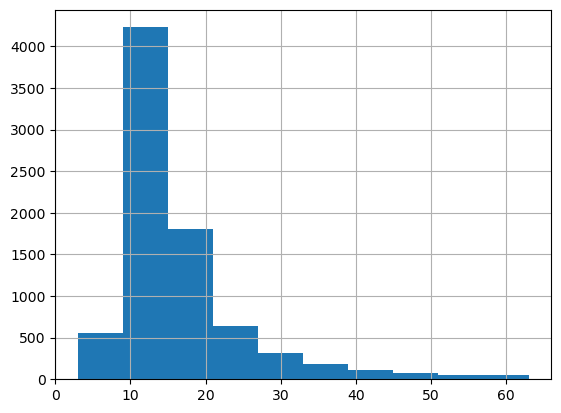

In [46]:
import numpy as np

mean = pockets["nres"].mean()
std = pockets["nres"].std()
filt = pockets[np.abs(pockets["nres"] - mean) / std < 3]
filt.nres.hist()

In [47]:
filt.sort_values("nres")

pdb     pocket  nres  site_in_pocket  pocket_in_site
6144  6s8f  pocket101     3        0.000000        0.000000
3836  7c7q   pocket45     5        0.000000        0.000000
7654  6zxm   pocket10     5        0.000000        0.000000
911   2qei   pocket20     5        0.000000        0.000000
7683  7aud   pocket17     5        0.000000        0.000000
...    ...        ...   ...             ...             ...
6380  6x9h    pocket1    62        0.968750        0.500000
4602  5y2f   pocket10    63        0.444444        0.126984
1311  3dc2    pocket2    63        0.000000        0.000000
4002  7a8p    pocket1    63        0.354839        0.174603
2129  5swo   pocket12    63        0.083333        0.015873

[8016 rows x 5 columns]

Outlier filtering retains pockets with reasonable sizes, thus outlier filtering will be performed for the training set.

<br>

### Overlap

array([[<Axes: title={'center': 'site_in_pocket'}>,
        <Axes: title={'center': 'pocket_in_site'}>]], dtype=object)

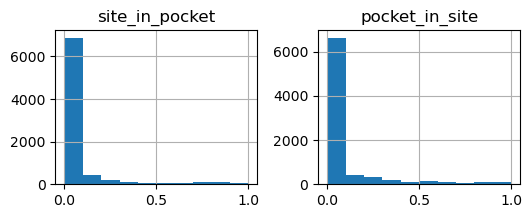

In [48]:
pockets.drop(columns="nres").hist(figsize=(6,2))

array([[<Axes: title={'center': 'site_in_pocket'}>,
        <Axes: title={'center': 'pocket_in_site'}>]], dtype=object)

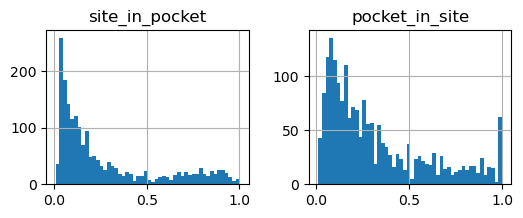

In [49]:
# Distributions without 0 values
pockets.loc[lambda x: x[['site_in_pocket', 'pocket_in_site']].sum(axis=1) != 0].drop(columns="nres").hist(bins=50, figsize=(6,2))

### Labelling

We label as positive pockets ("allosteric" pockets) those that contain 65% or more of the residues of the site in them (site_in_pocket >= 0.65), to represent pockets that overlap considerably with a single site each, and capture most of its extension.

In [50]:
pockets.loc[
    pockets.loc[
        lambda x: (x["site_in_pocket"] >= 0.65)
    ].index, 
    "label"
] = 1
pockets["label"] = pockets["label"].fillna(0).astype(int)

pockets

pdb    pocket  nres  site_in_pocket  pocket_in_site  label
0     6ta3  pocket16    12        0.000000          0.0000      0
1     6ta3  pocket18    13        0.000000          0.0000      0
2     6ta3  pocket11    16        0.000000          0.0000      0
3     6ta3  pocket15    11        0.000000          0.0000      0
4     6ta3   pocket7    42        0.000000          0.0000      0
...    ...       ...   ...             ...             ...    ...
8136  3d2p   pocket5    11        0.000000          0.0000      0
8137  3d2p   pocket8    19        0.000000          0.0000      0
8138  3d2p   pocket3    17        0.000000          0.0000      0
8139  3d2p  pocket12     7        0.000000          0.0000      0
8140  3d2p   pocket6    16        0.043478          0.0625      0

[8141 rows x 6 columns]

In [51]:
dropped = set(pockets.pdb.unique()) - set(pockets.loc[pockets.label == 1].pdb.unique())

print("Total initial PDBs, final PDBs, dropped PDBs, % of PDBs dropped, and list of dropped PDBs")
len(pockets.pdb.unique()), len(pockets.loc[pockets.label == 1].pdb.unique()), len(dropped), len(dropped)/len(pockets.pdb.unique()), dropped

Total initial PDBs, final PDBs, dropped PDBs, % of PDBs dropped, and list of dropped PDBs


(431,
 293,
 138,
 0.32018561484918795,
 {'11bg',
  '1bo5',
  '1fap',
  '1fx2',
  '1h78',
  '1h9g',
  '1hak',
  '1m8p',
  '1mc0',
  '1nh8',
  '1njj',
  '1o0s',
  '1owb',
  '1peo',
  '1qw7',
  '1raf',
  '1um8',
  '1uxq',
  '1vm1',
  '1vst',
  '1w0f',
  '1w25',
  '1w96',
  '2be9',
  '2bxg',
  '2csm',
  '2fqq',
  '2k31',
  '2nw8',
  '2onb',
  '2p5m',
  '2poc',
  '2rde',
  '2vd3',
  '2vd4',
  '2xje',
  '2y0p',
  '3blw',
  '3etl',
  '3f9n',
  '3fhz',
  '3gnw',
  '3hl8',
  '3ho8',
  '3hv8',
  '3la2',
  '3nwy',
  '3otu',
  '3prj',
  '3qku',
  '3rhw',
  '3s8b',
  '3tuv',
  '3u18',
  '3zkr',
  '4fkz',
  '4fxy',
  '4jn4',
  '4mbs',
  '4mdk',
  '4nir',
  '4oir',
  '4p02',
  '4p2t',
  '4p86',
  '4q0a',
  '4qpl',
  '4r1r',
  '4tqb',
  '4wf2',
  '4xcz',
  '4xnv',
  '4yw8',
  '4z87',
  '4zji',
  '5bq1',
  '5cc9',
  '5ded',
  '5f91',
  '5fts',
  '5h13',
  '5im3',
  '5ja7',
  '5kqd',
  '5llm',
  '5lu8',
  '5mfv',
  '5ndz',
  '5nn4',
  '5nzk',
  '5olk',
  '5osb',
  '5vsw',
  '5w40',
  '5wj6',
  '5x9u',


In [52]:
print("Total initial pockets, final pockets, positive pockets, and ratio of positive pockets")
len(pockets), len(pockets.query(f"pdb not in {list(dropped)}")), sum(pockets.label == 1), sum(pockets.label == 1)/len(pockets.query(f"pdb not in {list(dropped)}"))

Total initial pockets, final pockets, positive pockets, and ratio of positive pockets


(8141, 5522, 321, 0.05813111191597247)

FPocket with the old parameters fails to identify at least a considerably overlapping pocket with the allosteric site(s) for 32% of the PDBs, which is less than with the new parameters. The final % of positive pockets is ~6% of total remaining pockets, thus it identifies a bigger proportion of positive pockets than the new parameters.

<br>

In [53]:
final_pockets = pockets.query(f"pdb not in {list(dropped)}")

### Features

In [54]:
pockets_features = pd.concat(
    (
        final_pockets,
        final_pockets.apply(
            lambda row: pd.Series(
                Pocket(f"{old_fpocket_pockets_path}/{row['pdb']}/{row['pdb']}_out/pockets/{row['pocket']}_atm.cif").feats
            ), axis=1
        )
    ),
    axis=1
)

pockets_features

pdb    pocket  nres  site_in_pocket  pocket_in_site  label  \
0     6ta3  pocket16    12        0.000000          0.0000      0   
1     6ta3  pocket18    13        0.000000          0.0000      0   
2     6ta3  pocket11    16        0.000000          0.0000      0   
3     6ta3  pocket15    11        0.000000          0.0000      0   
4     6ta3   pocket7    42        0.000000          0.0000      0   
...    ...       ...   ...             ...             ...    ...   
8136  3d2p   pocket5    11        0.000000          0.0000      0   
8137  3d2p   pocket8    19        0.000000          0.0000      0   
8138  3d2p   pocket3    17        0.000000          0.0000      0   
8139  3d2p  pocket12     7        0.000000          0.0000      0   
8140  3d2p   pocket6    16        0.043478          0.0625      0   

      Pocket Score  Drug Score  Number of alpha spheres  \
0          -0.0160      0.0145                     79.0   
1          -0.0390      0.0001                     48.0   
2           0.0606      0.0180                     74.0   
3          -0.0097      0.0023                     37.0   
4           0.2518      0.9883                    244.0   
...            ...         ...                      ...   
8136        0.2167      0.0033                     41.0   
8137        0.0886      0.0057                    120.0   
8138        0.3030      0.0287                     75.0   
8139       -0.0406      0.0007                     36.0   
8140        0.1532      0.0075                     92.0   

      Mean alpha-sphere radius  ...  Local hydrophobic density Score  \
0                       3.4016  ...                          33.2273   
1                       3.5600  ...                           1.0000   
2                       3.4367  ...                          26.6829   
3                       3.3932  ...                          12.5714   
4                       3.5880  ...                          62.6740   
...                        ...  ...                              ...   
8136                    3.4642  ...                          13.8095   
8137                    3.5617  ...                           8.9565   
8138                    3.4781  ...                          16.0000   
8139                    3.6300  ...                          19.0000   
8140                    3.5363  ...                          16.3448   

      Number of apolar alpha sphere  Proportion of apolar alpha sphere  \
0                              44.0                             0.5570   
1                               2.0                             0.0417   
2                              41.0                             0.5541   
3                              14.0                             0.3784   
4                             181.0                             0.7418   
...                             ...                                ...   
8136                           21.0                             0.5122   
8137                           23.0                             0.1917   
8138                           26.0                             0.3467   
8139                           20.0                             0.5556   
8140                           29.0                             0.3152   

      Total SASA  Polar SASA  Apolar SASA  Proportion of polar atoms  \
0        145.162     102.895       42.267                     36.170   
1        141.742     101.890       39.852                     62.857   
2        116.997      36.739       80.258                     41.304   
3         97.871      30.244       67.627                     42.857   
4        387.794      90.401      297.393                     30.075   
...          ...         ...          ...                        ...   
8136      74.790      31.316       43.475                     36.364   
8137     205.618     101.049      104.569                     45.588   
8138     116.634      42.969       73.665                     44.68

In [55]:
pockets_features.to_pickle(f"{old_fpocket_path}/pockets.pkl")

## P2Rank

In [56]:
p2rank_path = "3.Pockets/p2rank"
p2rank_pockets_path = f"{p2rank_path}/pockets"
os.makedirs(p2rank_path, exist_ok=True)
os.makedirs(p2rank_pockets_path, exist_ok=True)

In [17]:
def predict_p2rank(pdb):    
    path = f"{p2rank_pockets_path}/{pdb}"
    if os.path.isdir(path):
        return
    else:
        print(pdb)
        os.makedirs(path, exist_ok=True)
        os.system(f"utils/external/p2rank_2.5/prank predict -f {structures_path}/{pdb}.cif -o {path} -log_to_console false -threads 30")

In [221]:
for pdb in tqdm(representatives, smoothing=0):
    predict_p2rank(pdb)

  0%|          | 0/483 [00:00<?, ?it/s]

6ta3
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6ta3.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6ta3.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.288 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6ta3]

Finished successfully in 0 hours 0 minutes 1.694 seconds.
5kwj
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5kwj.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5kwj.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.897 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5kwj]

Finished successfully in 0 hours 0 minutes 1.302 seconds.
6t4k
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6t4k.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6t4k.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.909 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6t4k]

Finished successfully in 0 hours 0 minutes 1.308 seconds.
5mo6
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset o6.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing o6.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.915 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5mo6]

Finished successfully in 0 hours 0 minutes 1.320 seconds.
3o0n
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3o0n.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3o0n.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.522 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3o0n]

Finished successfully in 0 hours 0 minutes 1.922 seconds.
1tjp
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1tjp.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1tjp.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.896 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1tjp]

Finished successfully in 0 hours 0 minutes 1.295 seconds.
2nw8
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2nw8.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2nw8.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.940 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2nw8]

Finished successfully in 0 hours 0 minutes 1.350 seconds.
4bqh
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4bqh.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4bqh.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.105 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4bqh]

Finished successfully in 0 hours 0 minutes 1.505 seconds.
1og0
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1og0.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1og0.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.157 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1og0]

Finished successfully in 0 hours 0 minutes 1.561 seconds.
3s8b
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3s8b.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3s8b.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.167 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3s8b]

Finished successfully in 0 hours 0 minutes 1.570 seconds.
6ncf
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6ncf.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6ncf.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.154 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6ncf]

Finished successfully in 0 hours 0 minutes 1.557 seconds.
3bay
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3bay.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3bay.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.016 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3bay]

Finished successfully in 0 hours 0 minutes 1.421 seconds.
5jv1
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5jv1.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5jv1.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.939 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5jv1]

Finished successfully in 0 hours 0 minutes 1.329 seconds.
3auy
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3auy.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3auy.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.980 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3auy]

Finished successfully in 0 hours 0 minutes 1.379 seconds.
5dl1
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5dl1.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5dl1.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.834 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5dl1]

Finished successfully in 0 hours 0 minutes 1.228 seconds.
3lla
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3lla.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3lla.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.895 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3lla]

Finished successfully in 0 hours 0 minutes 1.289 seconds.
7bhu
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7bhu.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7bhu.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.948 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7bhu]

Finished successfully in 0 hours 0 minutes 1.352 seconds.
1qqb
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1qqb.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1qqb.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.927 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1qqb]

Finished successfully in 0 hours 0 minutes 1.322 seconds.
2p5m
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2p5m.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2p5m.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.851 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2p5m]

Finished successfully in 0 hours 0 minutes 1.252 seconds.
6hgj
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6hgj.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6hgj.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.970 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6hgj]

Finished successfully in 0 hours 0 minutes 1.371 seconds.
4aau
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4aau.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4aau.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.089 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4aau]

Finished successfully in 0 hours 0 minutes 1.497 seconds.
4cff
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4cff.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4cff.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.420 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4cff]

Finished successfully in 0 hours 0 minutes 1.821 seconds.
7juv
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7juv.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7juv.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.193 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7juv]

Finished successfully in 0 hours 0 minutes 1.598 seconds.
4mbs
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset bs.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing bs.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.976 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4mbs]

Finished successfully in 0 hours 0 minutes 1.377 seconds.
6nzf
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6nzf.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6nzf.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.857 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6nzf]

Finished successfully in 0 hours 0 minutes 1.248 seconds.
5uyy
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5uyy.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5uyy.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.216 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5uyy]

Finished successfully in 0 hours 0 minutes 1.626 seconds.
5xez
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5xez.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5xez.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.127 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5xez]

Finished successfully in 0 hours 0 minutes 1.531 seconds.
3gds
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3gds.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3gds.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.872 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3gds]

Finished successfully in 0 hours 0 minutes 1.274 seconds.
2b08
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2b08.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2b08.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.936 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2b08]

Finished successfully in 0 hours 0 minutes 1.346 seconds.
4clz
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4clz.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4clz.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.051 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4clz]

Finished successfully in 0 hours 0 minutes 1.454 seconds.
2c2b
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2c2b.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2c2b.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.291 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2c2b]

Finished successfully in 0 hours 0 minutes 1.696 seconds.
1raf
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1raf.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1raf.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.820 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1raf]

Finished successfully in 0 hours 0 minutes 1.220 seconds.
2xje
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2xje.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2xje.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.043 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2xje]

Finished successfully in 0 hours 0 minutes 1.452 seconds.
3i0s
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3i0s.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3i0s.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.118 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3i0s]

Finished successfully in 0 hours 0 minutes 1.521 seconds.
4dpq
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4dpq.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4dpq.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.147 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4dpq]

Finished successfully in 0 hours 0 minutes 1.558 seconds.
2d5x
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2d5x.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2d5x.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.959 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2d5x]

Finished successfully in 0 hours 0 minutes 1.364 seconds.
7amj
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7amj.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7amj.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.921 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7amj]

Finished successfully in 0 hours 0 minutes 1.327 seconds.
3zqh
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3zqh.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3zqh.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.889 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3zqh]

Finished successfully in 0 hours 0 minutes 1.299 seconds.
2qmx
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2qmx.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2qmx.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.132 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2qmx]

Finished successfully in 0 hours 0 minutes 1.543 seconds.
3e5u
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3e5u.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3e5u.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.049 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3e5u]

Finished successfully in 0 hours 0 minutes 1.454 seconds.
6q4k
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6q4k.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6q4k.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.924 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6q4k]

Finished successfully in 0 hours 0 minutes 1.319 seconds.
4bo1
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4bo1.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4bo1.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.013 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4bo1]

Finished successfully in 0 hours 0 minutes 1.412 seconds.
6mo1
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset o1.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing o1.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.825 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6mo1]

Finished successfully in 0 hours 0 minutes 1.239 seconds.
2him
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2him.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2him.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.167 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2him]

Finished successfully in 0 hours 0 minutes 1.575 seconds.
2poc
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2poc.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2poc.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.914 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2poc]

Finished successfully in 0 hours 0 minutes 1.317 seconds.
5ja7
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5ja7.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5ja7.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.860 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5ja7]

Finished successfully in 0 hours 0 minutes 1.269 seconds.
5lhn
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5lhn.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5lhn.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.863 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5lhn]

Finished successfully in 0 hours 0 minutes 1.270 seconds.
6rkw
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6rkw.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6rkw.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.789 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6rkw]

Finished successfully in 0 hours 0 minutes 2.191 seconds.
5aa4
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5aa4.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5aa4.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.012 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5aa4]

Finished successfully in 0 hours 0 minutes 1.412 seconds.
4yw8
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4yw8.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4yw8.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.140 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4yw8]

Finished successfully in 0 hours 0 minutes 1.540 seconds.
5fts
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5fts.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5fts.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.919 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5fts]

Finished successfully in 0 hours 0 minutes 1.314 seconds.
5h08
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5h08.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5h08.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.892 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5h08]

Finished successfully in 0 hours 0 minutes 1.286 seconds.
5olk
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5olk.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5olk.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.979 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5olk]

Finished successfully in 0 hours 0 minutes 1.375 seconds.
3kq7
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3kq7.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3kq7.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.973 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3kq7]

Finished successfully in 0 hours 0 minutes 1.373 seconds.
2qei
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2qei.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2qei.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.056 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2qei]

Finished successfully in 0 hours 0 minutes 1.446 seconds.
8jii
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [8jii.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [8jii.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.898 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/8jii]

Finished successfully in 0 hours 0 minutes 1.304 seconds.
3u18
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3u18.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3u18.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.756 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3u18]

Finished successfully in 0 hours 0 minutes 1.157 seconds.
5y66
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5y66.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5y66.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.988 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5y66]

Finished successfully in 0 hours 0 minutes 1.388 seconds.
6pgr
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6pgr.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6pgr.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.242 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6pgr]

Finished successfully in 0 hours 0 minutes 1.634 seconds.
2ha2
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2ha2.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2ha2.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.075 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2ha2]

Finished successfully in 0 hours 0 minutes 1.479 seconds.
5dzh
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5dzh.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5dzh.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.875 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5dzh]

Finished successfully in 0 hours 0 minutes 1.266 seconds.
7anw
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7anw.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7anw.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.125 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7anw]

Finished successfully in 0 hours 0 minutes 1.527 seconds.
6kx3
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6kx3.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6kx3.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.844 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6kx3]

Finished successfully in 0 hours 0 minutes 1.247 seconds.
6e5g
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6e5g.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6e5g.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.852 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6e5g]

Finished successfully in 0 hours 0 minutes 1.243 seconds.
4pcu
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4pcu.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4pcu.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.413 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4pcu]

Finished successfully in 0 hours 0 minutes 1.815 seconds.
6bky
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6bky.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6bky.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.299 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6bky]

Finished successfully in 0 hours 0 minutes 1.700 seconds.
1hak
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1hak.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1hak.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.923 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1hak]

Finished successfully in 0 hours 0 minutes 1.332 seconds.
6gfm
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6gfm.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6gfm.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.988 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6gfm]

Finished successfully in 0 hours 0 minutes 1.398 seconds.
4ejl
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4ejl.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4ejl.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.770 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4ejl]

Finished successfully in 0 hours 0 minutes 1.177 seconds.
5lu8
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5lu8.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5lu8.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.891 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5lu8]

Finished successfully in 0 hours 0 minutes 1.296 seconds.
1fx2
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1fx2.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1fx2.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.884 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1fx2]

Finished successfully in 0 hours 0 minutes 1.277 seconds.
6fmz
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6fmz.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6fmz.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.148 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6fmz]

Finished successfully in 0 hours 0 minutes 1.550 seconds.
5f2e
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5f2e.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5f2e.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.835 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5f2e]

Finished successfully in 0 hours 0 minutes 1.240 seconds.
1o0s
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1o0s.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1o0s.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.135 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1o0s]

Finished successfully in 0 hours 0 minutes 1.526 seconds.
5w40
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5w40.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5w40.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.929 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5w40]

Finished successfully in 0 hours 0 minutes 1.334 seconds.
6r4d
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6r4d.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6r4d.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.910 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6r4d]

Finished successfully in 0 hours 0 minutes 1.317 seconds.
7ehm
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7ehm.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7ehm.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.903 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7ehm]

Finished successfully in 0 hours 0 minutes 1.307 seconds.
6o0h
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6o0h.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6o0h.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.409 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6o0h]

Finished successfully in 0 hours 0 minutes 1.813 seconds.
4a79
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4a79.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4a79.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.062 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4a79]

Finished successfully in 0 hours 0 minutes 1.484 seconds.
3dc2
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3dc2.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3dc2.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.071 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3dc2]

Finished successfully in 0 hours 0 minutes 1.476 seconds.
6ueg
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6ueg.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6ueg.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.053 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6ueg]

Finished successfully in 0 hours 0 minutes 1.460 seconds.
3kh5
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3kh5.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3kh5.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.893 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3kh5]

Finished successfully in 0 hours 0 minutes 1.290 seconds.
6u26
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6u26.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6u26.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.007 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6u26]

Finished successfully in 0 hours 0 minutes 1.433 seconds.
8hnn
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [8hnn.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [8hnn.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.863 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/8hnn]

Finished successfully in 0 hours 0 minutes 1.266 seconds.
5ngz
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5ngz.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5ngz.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.782 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5ngz]

Finished successfully in 0 hours 0 minutes 1.170 seconds.
7mew
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset ew.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing ew.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.184 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7mew]

Finished successfully in 0 hours 0 minutes 1.582 seconds.
4yi8
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4yi8.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4yi8.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.861 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4yi8]

Finished successfully in 0 hours 0 minutes 1.264 seconds.
5m1a
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset 1a.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing 1a.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.157 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5m1a]

Finished successfully in 0 hours 0 minutes 1.565 seconds.
3nwy
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3nwy.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3nwy.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.176 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3nwy]

Finished successfully in 0 hours 0 minutes 1.571 seconds.
4q0a
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4q0a.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4q0a.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.882 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4q0a]

Finished successfully in 0 hours 0 minutes 1.281 seconds.
3rhw
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3rhw.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3rhw.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.248 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3rhw]

Finished successfully in 0 hours 0 minutes 1.648 seconds.
3smq
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3smq.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3smq.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.992 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3smq]

Finished successfully in 0 hours 0 minutes 1.400 seconds.
4gx1
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4gx1.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4gx1.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.337 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4gx1]

Finished successfully in 0 hours 0 minutes 1.735 seconds.
6htf
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6htf.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6htf.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.786 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6htf]

Finished successfully in 0 hours 0 minutes 1.180 seconds.
5hue
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5hue.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5hue.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.955 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5hue]

Finished successfully in 0 hours 0 minutes 1.349 seconds.
4lrl
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4lrl.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4lrl.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.623 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4lrl]

Finished successfully in 0 hours 0 minutes 2.027 seconds.
5urj
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5urj.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5urj.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.717 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5urj]

Finished successfully in 0 hours 0 minutes 2.123 seconds.
7ofu
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7ofu.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7ofu.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.921 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7ofu]

Finished successfully in 0 hours 0 minutes 1.319 seconds.
6i2p
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6i2p.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6i2p.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.880 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6i2p]

Finished successfully in 0 hours 0 minutes 1.278 seconds.
6huj
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6huj.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6huj.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.822 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6huj]

Finished successfully in 0 hours 0 minutes 2.217 seconds.
1hkb
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1hkb.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1hkb.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.305 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1hkb]

Finished successfully in 0 hours 0 minutes 1.699 seconds.
2ldb
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2ldb.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2ldb.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.190 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2ldb]

Finished successfully in 0 hours 0 minutes 1.588 seconds.
3wmg
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3wmg.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3wmg.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.114 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3wmg]

Finished successfully in 0 hours 0 minutes 1.513 seconds.
2cdq
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2cdq.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2cdq.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.980 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2cdq]

Finished successfully in 0 hours 0 minutes 1.379 seconds.
5lvx
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5lvx.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5lvx.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.005 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5lvx]

Finished successfully in 0 hours 0 minutes 1.403 seconds.
2dz9
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2dz9.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2dz9.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.882 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2dz9]

Finished successfully in 0 hours 0 minutes 1.286 seconds.
1njj
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1njj.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1njj.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.947 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1njj]

Finished successfully in 0 hours 0 minutes 1.351 seconds.
5nqq
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5nqq.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5nqq.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.953 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5nqq]

Finished successfully in 0 hours 0 minutes 1.360 seconds.
3la2
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3la2.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3la2.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.863 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3la2]

Finished successfully in 0 hours 0 minutes 1.267 seconds.
1uxq
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1uxq.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1uxq.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.052 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1uxq]

Finished successfully in 0 hours 0 minutes 1.441 seconds.
1vst
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1vst.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1vst.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.874 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1vst]

Finished successfully in 0 hours 0 minutes 1.282 seconds.
4mdk
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset dk.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing dk.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.893 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4mdk]

Finished successfully in 0 hours 0 minutes 1.292 seconds.
6bvn
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6bvn.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6bvn.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.912 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6bvn]

Finished successfully in 0 hours 0 minutes 1.304 seconds.
4m1p
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset 1p.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing 1p.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.763 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4m1p]

Finished successfully in 0 hours 0 minutes 1.169 seconds.
1jlr
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1jlr.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1jlr.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.056 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1jlr]

Finished successfully in 0 hours 0 minutes 1.452 seconds.
5fii
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5fii.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5fii.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.829 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5fii]

Finished successfully in 0 hours 0 minutes 1.239 seconds.
4bxc
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4bxc.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4bxc.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.301 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4bxc]

Finished successfully in 0 hours 0 minutes 1.701 seconds.
5ifu
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5ifu.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5ifu.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.048 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5ifu]

Finished successfully in 0 hours 0 minutes 1.444 seconds.
4fxo
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4fxo.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4fxo.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.870 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4fxo]

Finished successfully in 0 hours 0 minutes 1.265 seconds.
7ljc
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7ljc.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7ljc.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.902 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7ljc]

Finished successfully in 0 hours 0 minutes 1.299 seconds.
2jfz
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2jfz.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2jfz.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.871 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2jfz]

Finished successfully in 0 hours 0 minutes 1.273 seconds.
6o0n
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6o0n.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6o0n.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.998 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6o0n]

Finished successfully in 0 hours 0 minutes 1.392 seconds.
6gvt
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6gvt.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6gvt.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.805 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6gvt]

Finished successfully in 0 hours 0 minutes 1.201 seconds.
5swo
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5swo.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5swo.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.610 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5swo]

Finished successfully in 0 hours 0 minutes 2.008 seconds.
6w6d
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6w6d.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6w6d.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.922 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6w6d]

Finished successfully in 0 hours 0 minutes 1.313 seconds.
4dn0
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4dn0.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4dn0.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.891 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4dn0]

Finished successfully in 0 hours 0 minutes 1.288 seconds.
6dhm
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6dhm.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6dhm.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.052 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6dhm]

Finished successfully in 0 hours 0 minutes 1.450 seconds.
3hv8
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3hv8.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3hv8.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.896 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3hv8]

Finished successfully in 0 hours 0 minutes 1.291 seconds.
5on7
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5on7.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5on7.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.929 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5on7]

Finished successfully in 0 hours 0 minutes 1.328 seconds.
5hot
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5hot.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5hot.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.007 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5hot]

Finished successfully in 0 hours 0 minutes 1.433 seconds.
1ig5
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1ig5.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1ig5.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.678 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1ig5]

Finished successfully in 0 hours 0 minutes 1.077 seconds.
5llm
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5llm.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5llm.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.968 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5llm]

Finished successfully in 0 hours 0 minutes 1.373 seconds.
3kjn
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3kjn.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3kjn.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.910 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3kjn]

Finished successfully in 0 hours 0 minutes 1.320 seconds.
6shq
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6shq.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6shq.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.359 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6shq]

Finished successfully in 0 hours 0 minutes 1.772 seconds.
4coj
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4coj.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4coj.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.482 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4coj]

Finished successfully in 0 hours 0 minutes 1.889 seconds.
2k31
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2k31.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2k31.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.843 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2k31]

Finished successfully in 0 hours 0 minutes 1.250 seconds.
5tkb
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5tkb.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5tkb.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.926 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5tkb]

Finished successfully in 0 hours 0 minutes 1.333 seconds.
6imx
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6imx.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6imx.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.747 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6imx]

Finished successfully in 0 hours 0 minutes 1.147 seconds.
5mro
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset ro.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing ro.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.877 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5mro]

Finished successfully in 0 hours 0 minutes 1.293 seconds.
6i5g
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6i5g.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6i5g.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.922 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6i5g]

Finished successfully in 0 hours 0 minutes 1.327 seconds.
2bu6
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2bu6.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2bu6.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.965 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2bu6]

Finished successfully in 0 hours 0 minutes 1.374 seconds.
4zsk
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4zsk.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4zsk.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.838 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4zsk]

Finished successfully in 0 hours 0 minutes 1.239 seconds.
5x33
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5x33.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5x33.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.053 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5x33]

Finished successfully in 0 hours 0 minutes 1.464 seconds.
1nh8
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1nh8.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1nh8.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.882 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1nh8]

Finished successfully in 0 hours 0 minutes 1.288 seconds.
5m0s
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset 0s.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing 0s.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.238 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5m0s]

Finished successfully in 0 hours 0 minutes 1.643 seconds.
6f7i
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6f7i.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6f7i.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.933 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6f7i]

Finished successfully in 0 hours 0 minutes 1.328 seconds.
5yve
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5yve.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5yve.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.930 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5yve]

Finished successfully in 0 hours 0 minutes 1.322 seconds.
6usa
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6usa.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6usa.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.167 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6usa]

Finished successfully in 0 hours 0 minutes 1.560 seconds.
2vk1
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2vk1.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2vk1.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.074 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2vk1]

Finished successfully in 0 hours 0 minutes 1.475 seconds.
1t34
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1t34.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1t34.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.001 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1t34]

Finished successfully in 0 hours 0 minutes 1.413 seconds.
7ejx
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7ejx.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7ejx.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.875 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7ejx]

Finished successfully in 0 hours 0 minutes 1.283 seconds.
2yn6
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2yn6.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2yn6.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.955 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2yn6]

Finished successfully in 0 hours 0 minutes 1.365 seconds.
1owb
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1owb.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1owb.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.044 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1owb]

Finished successfully in 0 hours 0 minutes 1.452 seconds.
5kcv
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5kcv.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5kcv.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.973 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5kcv]

Finished successfully in 0 hours 0 minutes 1.386 seconds.
3f6g
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3f6g.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3f6g.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.862 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3f6g]

Finished successfully in 0 hours 0 minutes 1.268 seconds.
4avc
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4avc.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4avc.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.937 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4avc]

Finished successfully in 0 hours 0 minutes 1.344 seconds.
4yga
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4yga.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4yga.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.998 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4yga]

Finished successfully in 0 hours 0 minutes 1.403 seconds.
3cmu
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3cmu.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3cmu.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.762 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3cmu]

Finished successfully in 0 hours 0 minutes 2.164 seconds.
3c36
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3c36.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3c36.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.114 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3c36]

Finished successfully in 0 hours 0 minutes 1.516 seconds.
5i73
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5i73.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5i73.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.089 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5i73]

Finished successfully in 0 hours 0 minutes 1.489 seconds.
6uec
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6uec.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6uec.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.950 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6uec]

Finished successfully in 0 hours 0 minutes 1.355 seconds.
3c1n
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3c1n.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3c1n.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.316 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3c1n]

Finished successfully in 0 hours 0 minutes 1.717 seconds.
5v03
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5v03.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5v03.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.916 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5v03]

Finished successfully in 0 hours 0 minutes 1.327 seconds.
1h78
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1h78.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1h78.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.075 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1h78]

Finished successfully in 0 hours 0 minutes 1.481 seconds.
4ypl
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4ypl.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4ypl.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.111 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4ypl]

Finished successfully in 0 hours 0 minutes 1.522 seconds.
5oj0
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5oj0.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5oj0.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.176 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5oj0]

Finished successfully in 0 hours 0 minutes 1.586 seconds.
5f6y
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5f6y.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5f6y.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.815 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5f6y]

Finished successfully in 0 hours 0 minutes 1.214 seconds.
1w96
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1w96.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1w96.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.094 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1w96]

Finished successfully in 0 hours 0 minutes 1.485 seconds.
5htc
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5htc.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5htc.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.940 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5htc]

Finished successfully in 0 hours 0 minutes 1.350 seconds.
6qxa
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6qxa.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6qxa.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.126 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6qxa]

Finished successfully in 0 hours 0 minutes 1.524 seconds.
5nxd
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5nxd.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5nxd.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.913 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5nxd]

Finished successfully in 0 hours 0 minutes 1.314 seconds.
2o8e
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2o8e.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2o8e.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.315 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2o8e]

Finished successfully in 0 hours 0 minutes 1.721 seconds.
6cwy
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6cwy.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6cwy.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.284 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6cwy]

Finished successfully in 0 hours 0 minutes 1.685 seconds.
3s5j
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3s5j.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3s5j.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.941 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3s5j]

Finished successfully in 0 hours 0 minutes 1.351 seconds.
5c2o
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5c2o.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5c2o.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.810 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5c2o]

Finished successfully in 0 hours 0 minutes 1.214 seconds.
6uxy
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6uxy.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6uxy.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.137 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6uxy]

Finished successfully in 0 hours 0 minutes 1.535 seconds.
1i6k
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1i6k.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1i6k.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.915 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1i6k]

Finished successfully in 0 hours 0 minutes 1.327 seconds.
4tqb
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4tqb.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4tqb.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.884 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4tqb]

Finished successfully in 0 hours 0 minutes 1.284 seconds.
5wsb
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5wsb.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5wsb.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.999 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5wsb]

Finished successfully in 0 hours 0 minutes 1.405 seconds.
8v8c
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [8v8c.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [8v8c.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.306 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/8v8c]

Finished successfully in 0 hours 0 minutes 1.696 seconds.
2ylq
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2ylq.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2ylq.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.863 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2ylq]

Finished successfully in 0 hours 0 minutes 1.260 seconds.
1m8p
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset 8p.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing 8p.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.110 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1m8p]

Finished successfully in 0 hours 0 minutes 1.509 seconds.
6zgv
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6zgv.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6zgv.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.978 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6zgv]

Finished successfully in 0 hours 0 minutes 1.375 seconds.
6tpk
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6tpk.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6tpk.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.878 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6tpk]

Finished successfully in 0 hours 0 minutes 2.277 seconds.
4z6a
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4z6a.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4z6a.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.979 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4z6a]

Finished successfully in 0 hours 0 minutes 1.368 seconds.
5we8
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5we8.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5we8.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.926 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5we8]

Finished successfully in 0 hours 0 minutes 1.333 seconds.
4nir
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4nir.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4nir.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.863 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4nir]

Finished successfully in 0 hours 0 minutes 1.262 seconds.
1tb6
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1tb6.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1tb6.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.209 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1tb6]

Finished successfully in 0 hours 0 minutes 1.603 seconds.
3e3i
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3e3i.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3e3i.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.865 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3e3i]

Finished successfully in 0 hours 0 minutes 1.281 seconds.
6jta
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6jta.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6jta.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.430 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6jta]

Finished successfully in 0 hours 0 minutes 1.822 seconds.
6qu3
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6qu3.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6qu3.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.989 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6qu3]

Finished successfully in 0 hours 0 minutes 1.387 seconds.
6c98
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6c98.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6c98.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.997 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6c98]

Finished successfully in 0 hours 0 minutes 1.395 seconds.
3fhz
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3fhz.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3fhz.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.145 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3fhz]

Finished successfully in 0 hours 0 minutes 1.537 seconds.
2vd3
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2vd3.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2vd3.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.911 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2vd3]

Finished successfully in 0 hours 0 minutes 1.314 seconds.
1w25
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1w25.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1w25.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.000 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1w25]

Finished successfully in 0 hours 0 minutes 1.397 seconds.
4fgt
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4fgt.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4fgt.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.893 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4fgt]

Finished successfully in 0 hours 0 minutes 1.285 seconds.
1q43
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1q43.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1q43.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.857 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1q43]

Finished successfully in 0 hours 0 minutes 1.243 seconds.
3x1m
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3x1m.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3x1m.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.978 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3x1m]

Finished successfully in 0 hours 0 minutes 1.380 seconds.
4wlw
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4wlw.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4wlw.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.787 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4wlw]

Finished successfully in 0 hours 0 minutes 1.180 seconds.
6d9s
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6d9s.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6d9s.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.861 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6d9s]

Finished successfully in 0 hours 0 minutes 1.256 seconds.
6vwp
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6vwp.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6vwp.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.021 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6vwp]

Finished successfully in 0 hours 0 minutes 1.413 seconds.
2zb2
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2zb2.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2zb2.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.720 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2zb2]

Finished successfully in 0 hours 0 minutes 2.126 seconds.
1msv
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset sv.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing sv.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.925 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1msv]

Finished successfully in 0 hours 0 minutes 1.315 seconds.
1yp2
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1yp2.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1yp2.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.301 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1yp2]

Finished successfully in 0 hours 0 minutes 1.700 seconds.
1bo5
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1bo5.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1bo5.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.026 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1bo5]

Finished successfully in 0 hours 0 minutes 1.420 seconds.
3uvv
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3uvv.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3uvv.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.844 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3uvv]

Finished successfully in 0 hours 0 minutes 1.251 seconds.
7lgu
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7lgu.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7lgu.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.199 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7lgu]

Finished successfully in 0 hours 0 minutes 1.598 seconds.
6mc1
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset c1.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing c1.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.785 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6mc1]

Finished successfully in 0 hours 0 minutes 1.183 seconds.
5zwj
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5zwj.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5zwj.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.908 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5zwj]

Finished successfully in 0 hours 0 minutes 1.321 seconds.
5npk
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5npk.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5npk.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.155 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5npk]

Finished successfully in 0 hours 0 minutes 1.581 seconds.
2p9g
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2p9g.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2p9g.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.307 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2p9g]

Finished successfully in 0 hours 0 minutes 1.702 seconds.
4b6e
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4b6e.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4b6e.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.125 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4b6e]

Finished successfully in 0 hours 0 minutes 1.520 seconds.
5f91
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5f91.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5f91.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.321 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5f91]

Finished successfully in 0 hours 0 minutes 1.716 seconds.
6w30
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6w30.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6w30.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.894 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6w30]

Finished successfully in 0 hours 0 minutes 1.289 seconds.
6z89
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6z89.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6z89.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.002 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6z89]

Finished successfully in 0 hours 0 minutes 1.401 seconds.
6li0
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6li0.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6li0.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.981 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6li0]

Finished successfully in 0 hours 0 minutes 1.376 seconds.
5o2d
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5o2d.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5o2d.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.847 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5o2d]

Finished successfully in 0 hours 0 minutes 1.238 seconds.
8jr9
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [8jr9.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [8jr9.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.146 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/8jr9]

Finished successfully in 0 hours 0 minutes 1.548 seconds.
8tb7
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [8tb7.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [8tb7.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.949 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/8tb7]

Finished successfully in 0 hours 0 minutes 1.342 seconds.
4ofg
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4ofg.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4ofg.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.825 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4ofg]

Finished successfully in 0 hours 0 minutes 1.216 seconds.
5y8t
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5y8t.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5y8t.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.828 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5y8t]

Finished successfully in 0 hours 0 minutes 1.224 seconds.
7cr7
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7cr7.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7cr7.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.299 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7cr7]

Finished successfully in 0 hours 0 minutes 1.693 seconds.
1peo
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1peo.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1peo.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.185 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1peo]

Finished successfully in 0 hours 0 minutes 1.582 seconds.
2bxg
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2bxg.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2bxg.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.130 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2bxg]

Finished successfully in 0 hours 0 minutes 1.531 seconds.
7lz4
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7lz4.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7lz4.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.892 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7lz4]

Finished successfully in 0 hours 0 minutes 1.292 seconds.
6qxl
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6qxl.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6qxl.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.991 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6qxl]

Finished successfully in 0 hours 0 minutes 1.394 seconds.
4kga
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4kga.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4kga.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.845 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4kga]

Finished successfully in 0 hours 0 minutes 1.241 seconds.
7c7q
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7c7q.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7c7q.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.609 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7c7q]

Finished successfully in 0 hours 0 minutes 2.011 seconds.
6kun
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6kun.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6kun.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.871 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6kun]

Finished successfully in 0 hours 0 minutes 1.263 seconds.
7dtt
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7dtt.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7dtt.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.305 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7dtt]

Finished successfully in 0 hours 0 minutes 1.705 seconds.
7lmy
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7lmy.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7lmy.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.323 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7lmy]

Finished successfully in 0 hours 0 minutes 1.722 seconds.
8jpf
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [8jpf.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [8jpf.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.921 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/8jpf]

Finished successfully in 0 hours 0 minutes 1.317 seconds.
6s2t
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6s2t.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6s2t.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.993 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6s2t]

Finished successfully in 0 hours 0 minutes 1.390 seconds.
2zv2
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2zv2.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2zv2.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.906 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2zv2]

Finished successfully in 0 hours 0 minutes 1.292 seconds.
5kls
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5kls.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5kls.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.038 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5kls]

Finished successfully in 0 hours 0 minutes 1.436 seconds.
6x83
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6x83.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6x83.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.989 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6x83]

Finished successfully in 0 hours 0 minutes 1.385 seconds.
3eps
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3eps.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3eps.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.141 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3eps]

Finished successfully in 0 hours 0 minutes 1.529 seconds.
6on5
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6on5.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6on5.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.957 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6on5]

Finished successfully in 0 hours 0 minutes 1.360 seconds.
4mi4
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset i4.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing i4.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.969 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4mi4]

Finished successfully in 0 hours 0 minutes 1.366 seconds.
7a8p
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7a8p.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7a8p.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.317 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7a8p]

Finished successfully in 0 hours 0 minutes 1.722 seconds.
3nqs
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3nqs.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3nqs.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.993 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3nqs]

Finished successfully in 0 hours 0 minutes 1.385 seconds.
3etl
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3etl.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3etl.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.900 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3etl]

Finished successfully in 0 hours 0 minutes 1.310 seconds.
4or2
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4or2.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4or2.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.967 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4or2]

Finished successfully in 0 hours 0 minutes 1.377 seconds.
4r1r
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4r1r.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4r1r.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.197 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4r1r]

Finished successfully in 0 hours 0 minutes 1.593 seconds.
7xw5
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7xw5.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7xw5.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.130 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7xw5]

Finished successfully in 0 hours 0 minutes 1.536 seconds.
4qby
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4qby.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4qby.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.025 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4qby]

Finished successfully in 0 hours 0 minutes 1.422 seconds.
3zm9
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3zm9.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3zm9.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.971 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3zm9]

Finished successfully in 0 hours 0 minutes 1.363 seconds.
5kml
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5kml.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5kml.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.948 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5kml]

Finished successfully in 0 hours 0 minutes 1.343 seconds.
7cfn
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7cfn.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7cfn.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.895 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7cfn]

Finished successfully in 0 hours 0 minutes 1.302 seconds.
2csm
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2csm.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2csm.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.890 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2csm]

Finished successfully in 0 hours 0 minutes 1.304 seconds.
5nif
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5nif.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5nif.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.064 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5nif]

Finished successfully in 0 hours 0 minutes 1.464 seconds.
6rrp
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6rrp.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6rrp.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.974 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6rrp]

Finished successfully in 0 hours 0 minutes 1.363 seconds.
5cc9
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5cc9.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5cc9.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.857 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5cc9]

Finished successfully in 0 hours 0 minutes 1.252 seconds.
1mho
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset ho.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing ho.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.777 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1mho]

Finished successfully in 0 hours 0 minutes 1.172 seconds.
6kkb
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6kkb.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6kkb.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.884 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6kkb]

Finished successfully in 0 hours 0 minutes 1.277 seconds.
5lrs
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5lrs.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5lrs.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.893 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5lrs]

Finished successfully in 0 hours 0 minutes 1.284 seconds.
4q9o
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4q9o.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4q9o.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.893 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4q9o]

Finished successfully in 0 hours 0 minutes 1.290 seconds.
2bty
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2bty.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2bty.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.879 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2bty]

Finished successfully in 0 hours 0 minutes 1.282 seconds.
2fhy
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2fhy.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2fhy.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.150 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2fhy]

Finished successfully in 0 hours 0 minutes 1.552 seconds.
5k8t
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5k8t.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5k8t.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.043 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5k8t]

Finished successfully in 0 hours 0 minutes 1.439 seconds.
5l7i
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5l7i.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5l7i.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.123 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5l7i]

Finished successfully in 0 hours 0 minutes 1.527 seconds.
5kde
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5kde.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5kde.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.837 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5kde]

Finished successfully in 0 hours 0 minutes 1.227 seconds.
3gnw
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3gnw.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3gnw.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.075 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3gnw]

Finished successfully in 0 hours 0 minutes 1.470 seconds.
7d7f
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7d7f.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7d7f.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.128 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7d7f]

Finished successfully in 0 hours 0 minutes 1.534 seconds.
3fud
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3fud.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3fud.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.139 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3fud]

Finished successfully in 0 hours 0 minutes 1.540 seconds.
4wf2
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4wf2.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4wf2.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.919 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4wf2]

Finished successfully in 0 hours 0 minutes 1.323 seconds.
3wgg
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3wgg.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3wgg.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.048 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3wgg]

Finished successfully in 0 hours 0 minutes 1.453 seconds.
4zji
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4zji.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4zji.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.920 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4zji]

Finished successfully in 0 hours 0 minutes 1.319 seconds.
3b1t
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3b1t.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3b1t.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.107 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3b1t]

Finished successfully in 0 hours 0 minutes 1.516 seconds.
3cev
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3cev.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3cev.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.149 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3cev]

Finished successfully in 0 hours 0 minutes 1.553 seconds.
3ho6
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3ho6.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3ho6.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.890 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3ho6]

Finished successfully in 0 hours 0 minutes 1.306 seconds.
5xzr
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5xzr.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5xzr.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.110 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5xzr]

Finished successfully in 0 hours 0 minutes 1.520 seconds.
6w2j
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6w2j.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6w2j.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.544 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6w2j]

Finished successfully in 0 hours 0 minutes 1.950 seconds.
5nzk
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5nzk.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5nzk.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.034 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5nzk]

Finished successfully in 0 hours 0 minutes 1.449 seconds.
2vvt
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2vvt.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2vvt.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.889 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2vvt]

Finished successfully in 0 hours 0 minutes 1.301 seconds.
7dpt
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7dpt.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7dpt.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.109 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7dpt]

Finished successfully in 0 hours 0 minutes 1.509 seconds.
3tho
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3tho.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3tho.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.958 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3tho]

Finished successfully in 0 hours 0 minutes 1.366 seconds.
5wmv
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5wmv.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5wmv.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.961 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5wmv]

Finished successfully in 0 hours 0 minutes 1.371 seconds.
6cjx
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6cjx.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6cjx.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.860 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6cjx]

Finished successfully in 0 hours 0 minutes 1.268 seconds.
5y2f
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5y2f.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5y2f.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.911 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5y2f]

Finished successfully in 0 hours 0 minutes 1.327 seconds.
5cus
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5cus.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5cus.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.295 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5cus]

Finished successfully in 0 hours 0 minutes 1.695 seconds.
1bj4
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1bj4.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1bj4.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.001 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1bj4]

Finished successfully in 0 hours 0 minutes 1.402 seconds.
5nn4
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5nn4.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5nn4.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.261 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5nn4]

Finished successfully in 0 hours 0 minutes 1.682 seconds.
1vea
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1vea.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1vea.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.904 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1vea]

Finished successfully in 0 hours 0 minutes 1.311 seconds.
7aia
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7aia.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7aia.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.915 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7aia]

Finished successfully in 0 hours 0 minutes 1.319 seconds.
2pbk
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2pbk.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2pbk.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.873 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2pbk]

Finished successfully in 0 hours 0 minutes 1.289 seconds.
5jqh
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5jqh.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5jqh.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.004 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5jqh]

Finished successfully in 0 hours 0 minutes 1.404 seconds.
5u7m
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5u7m.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5u7m.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.027 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5u7m]

Finished successfully in 0 hours 0 minutes 1.429 seconds.
5var
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5var.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5var.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.787 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5var]

Finished successfully in 0 hours 0 minutes 1.207 seconds.
4ov9
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4ov9.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4ov9.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.954 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4ov9]

Finished successfully in 0 hours 0 minutes 1.347 seconds.
5ogc
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5ogc.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5ogc.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.952 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5ogc]

Finished successfully in 0 hours 0 minutes 1.356 seconds.
4z07
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4z07.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4z07.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.114 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4z07]

Finished successfully in 0 hours 0 minutes 1.512 seconds.
7q12
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7q12.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7q12.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.534 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7q12]

Finished successfully in 0 hours 0 minutes 1.940 seconds.
6fba
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6fba.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6fba.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.177 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6fba]

Finished successfully in 0 hours 0 minutes 1.587 seconds.
11bg
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [11bg.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [11bg.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.807 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/11bg]

Finished successfully in 0 hours 0 minutes 1.215 seconds.
4ohf
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4ohf.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4ohf.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.389 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4ohf]

Finished successfully in 0 hours 0 minutes 1.792 seconds.
5xe9
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5xe9.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5xe9.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.799 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5xe9]

Finished successfully in 0 hours 0 minutes 1.190 seconds.
3ho8
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3ho8.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3ho8.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.915 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3ho8]

Finished successfully in 0 hours 0 minutes 2.313 seconds.
6vvd
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6vvd.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6vvd.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.956 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6vvd]

Finished successfully in 0 hours 0 minutes 1.358 seconds.
3hl8
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3hl8.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3hl8.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.076 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3hl8]

Finished successfully in 0 hours 0 minutes 1.483 seconds.
6ku3
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6ku3.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6ku3.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.139 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6ku3]

Finished successfully in 0 hours 0 minutes 1.535 seconds.
5o03
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5o03.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5o03.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.133 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5o03]

Finished successfully in 0 hours 0 minutes 1.537 seconds.
6iil
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6iil.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6iil.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.943 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6iil]

Finished successfully in 0 hours 0 minutes 1.344 seconds.
3blw
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3blw.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3blw.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.168 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3blw]

Finished successfully in 0 hours 0 minutes 1.563 seconds.
5klq
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5klq.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5klq.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.936 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5klq]

Finished successfully in 0 hours 0 minutes 1.341 seconds.
3d2e
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3d2e.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3d2e.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.157 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3d2e]

Finished successfully in 0 hours 0 minutes 1.569 seconds.
5oyj
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5oyj.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5oyj.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.035 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5oyj]

Finished successfully in 0 hours 0 minutes 1.429 seconds.
1zxm
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1zxm.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1zxm.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.955 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1zxm]

Finished successfully in 0 hours 0 minutes 1.358 seconds.
6e3u
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6e3u.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6e3u.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.939 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6e3u]

Finished successfully in 0 hours 0 minutes 1.346 seconds.
6yd5
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6yd5.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6yd5.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.913 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6yd5]

Finished successfully in 0 hours 0 minutes 1.320 seconds.
5osb
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5osb.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5osb.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.149 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5osb]

Finished successfully in 0 hours 0 minutes 1.538 seconds.
5f1u
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5f1u.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5f1u.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.099 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5f1u]

Finished successfully in 0 hours 0 minutes 1.502 seconds.
4z61
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4z61.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4z61.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.092 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4z61]

Finished successfully in 0 hours 0 minutes 1.487 seconds.
1l5g
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1l5g.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1l5g.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.655 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1l5g]

Finished successfully in 0 hours 0 minutes 2.040 seconds.
4w9n
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4w9n.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4w9n.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.198 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4w9n]

Finished successfully in 0 hours 0 minutes 1.597 seconds.
5w6y
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


predicting pockets for proteins from dataset [5w6y.cif]
processing [5w6y.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.100 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5w6y]

Finished successfully in 0 hours 0 minutes 1.490 seconds.
4nes
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4nes.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4nes.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.947 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4nes]

Finished successfully in 0 hours 0 minutes 1.349 seconds.
5wj6
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5wj6.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5wj6.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.961 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5wj6]

Finished successfully in 0 hours 0 minutes 1.354 seconds.
3i59
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3i59.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3i59.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.012 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3i59]

Finished successfully in 0 hours 0 minutes 1.417 seconds.
6eg3
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6eg3.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6eg3.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.162 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6eg3]

Finished successfully in 0 hours 0 minutes 1.559 seconds.
6boz
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6boz.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6boz.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.922 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6boz]

Finished successfully in 0 hours 0 minutes 1.327 seconds.
4z87
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4z87.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4z87.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.468 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4z87]

Finished successfully in 0 hours 0 minutes 1.863 seconds.
5ndz
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5ndz.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5ndz.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.123 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5ndz]

Finished successfully in 0 hours 0 minutes 1.529 seconds.
5crl
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5crl.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5crl.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.870 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5crl]

Finished successfully in 0 hours 0 minutes 1.262 seconds.
6d7o
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6d7o.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6d7o.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.187 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6d7o]

Finished successfully in 0 hours 0 minutes 1.590 seconds.
1r1v
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1r1v.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1r1v.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.754 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1r1v]

Finished successfully in 0 hours 0 minutes 1.145 seconds.
5k1c
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5k1c.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5k1c.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.250 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5k1c]

Finished successfully in 0 hours 0 minutes 1.650 seconds.
6nbl
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6nbl.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6nbl.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.004 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6nbl]

Finished successfully in 0 hours 0 minutes 1.405 seconds.
5kqd
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5kqd.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5kqd.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.946 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5kqd]

Finished successfully in 0 hours 0 minutes 1.340 seconds.
1fap
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1fap.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1fap.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.882 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1fap]

Finished successfully in 0 hours 0 minutes 1.280 seconds.
3uqd
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3uqd.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3uqd.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.351 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3uqd]

Finished successfully in 0 hours 0 minutes 1.756 seconds.
1egy
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1egy.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1egy.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.963 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1egy]

Finished successfully in 0 hours 0 minutes 1.356 seconds.
4g9c
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4g9c.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4g9c.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.872 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4g9c]

Finished successfully in 0 hours 0 minutes 1.265 seconds.
6thc
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6thc.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6thc.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.007 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6thc]

Finished successfully in 0 hours 0 minutes 1.401 seconds.
6swx
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6swx.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6swx.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.074 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6swx]

Finished successfully in 0 hours 0 minutes 1.472 seconds.
5icn
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5icn.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5icn.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.133 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5icn]

Finished successfully in 0 hours 0 minutes 1.532 seconds.
2y0p
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2y0p.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2y0p.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.233 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2y0p]

Finished successfully in 0 hours 0 minutes 1.620 seconds.
4c8b
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4c8b.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4c8b.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.887 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4c8b]

Finished successfully in 0 hours 0 minutes 1.280 seconds.
4jn4
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4jn4.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4jn4.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.137 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4jn4]

Finished successfully in 0 hours 0 minutes 1.542 seconds.
6wkn
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6wkn.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6wkn.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.602 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6wkn]

Finished successfully in 0 hours 0 minutes 2.014 seconds.
2iub
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2iub.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2iub.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.927 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2iub]

Finished successfully in 0 hours 0 minutes 1.327 seconds.
1tbf
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1tbf.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1tbf.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.911 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1tbf]

Finished successfully in 0 hours 0 minutes 1.302 seconds.
4p02
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4p02.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4p02.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.198 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4p02]

Finished successfully in 0 hours 0 minutes 1.595 seconds.
6pwh
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6pwh.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6pwh.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.910 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6pwh]

Finished successfully in 0 hours 0 minutes 1.313 seconds.
1ecb
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1ecb.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1ecb.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.343 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1ecb]

Finished successfully in 0 hours 0 minutes 1.735 seconds.
6qzh
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6qzh.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6qzh.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.237 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6qzh]

Finished successfully in 0 hours 0 minutes 1.633 seconds.
4xnv
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4xnv.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4xnv.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.937 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4xnv]

Finished successfully in 0 hours 0 minutes 1.339 seconds.
2vd4
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2vd4.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2vd4.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.034 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2vd4]

Finished successfully in 0 hours 0 minutes 1.432 seconds.
6pf1
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6pf1.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6pf1.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.912 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6pf1]

Finished successfully in 0 hours 0 minutes 1.309 seconds.
3obk
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3obk.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3obk.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.981 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3obk]

Finished successfully in 0 hours 0 minutes 1.376 seconds.
3pjg
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3pjg.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3pjg.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.981 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3pjg]

Finished successfully in 0 hours 0 minutes 1.382 seconds.
6vkk
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6vkk.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6vkk.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.907 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6vkk]

Finished successfully in 0 hours 0 minutes 1.297 seconds.
6bbq
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6bbq.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6bbq.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.119 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6bbq]

Finished successfully in 0 hours 0 minutes 1.517 seconds.
7lw1
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7lw1.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7lw1.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.223 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7lw1]

Finished successfully in 0 hours 0 minutes 1.619 seconds.
6zod
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6zod.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6zod.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.389 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6zod]

Finished successfully in 0 hours 0 minutes 1.811 seconds.
3zg1
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3zg1.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3zg1.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.784 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3zg1]

Finished successfully in 0 hours 0 minutes 1.187 seconds.
5z46
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5z46.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5z46.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.908 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5z46]

Finished successfully in 0 hours 0 minutes 1.315 seconds.
5x9u
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5x9u.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5x9u.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.036 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5x9u]

Finished successfully in 0 hours 0 minutes 1.434 seconds.
4rzt
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4rzt.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4rzt.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.926 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4rzt]

Finished successfully in 0 hours 0 minutes 1.336 seconds.
6dja
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6dja.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6dja.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.817 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6dja]

Finished successfully in 0 hours 0 minutes 1.202 seconds.
5nj3
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5nj3.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5nj3.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.507 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5nj3]

Finished successfully in 0 hours 0 minutes 1.925 seconds.
1t5a
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1t5a.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1t5a.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.079 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1t5a]

Finished successfully in 0 hours 0 minutes 1.482 seconds.
6yuh
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6yuh.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6yuh.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.026 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6yuh]

Finished successfully in 0 hours 0 minutes 1.430 seconds.
7ld3
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7ld3.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7ld3.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.903 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7ld3]

Finished successfully in 0 hours 0 minutes 1.298 seconds.
4o3u
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4o3u.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4o3u.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.830 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4o3u]

Finished successfully in 0 hours 0 minutes 1.220 seconds.
3otu
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3otu.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3otu.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.904 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3otu]

Finished successfully in 0 hours 0 minutes 1.301 seconds.
4aqh
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4aqh.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4aqh.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.943 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4aqh]

Finished successfully in 0 hours 0 minutes 1.333 seconds.
6g1b
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6g1b.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6g1b.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.941 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6g1b]

Finished successfully in 0 hours 0 minutes 1.337 seconds.
5gug
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5gug.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5gug.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.884 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5gug]

Finished successfully in 0 hours 0 minutes 2.275 seconds.
1kmp
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1kmp.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1kmp.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.158 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1kmp]

Finished successfully in 0 hours 0 minutes 1.559 seconds.
6s8f
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6s8f.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6s8f.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.806 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6s8f]

Finished successfully in 0 hours 0 minutes 2.207 seconds.
1rd4
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1rd4.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1rd4.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.822 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1rd4]

Finished successfully in 0 hours 0 minutes 1.217 seconds.
6xnv
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6xnv.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6xnv.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.871 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6xnv]

Finished successfully in 0 hours 0 minutes 1.261 seconds.
4kzt
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4kzt.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4kzt.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.992 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4kzt]

Finished successfully in 0 hours 0 minutes 1.397 seconds.
3zou
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3zou.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3zou.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.891 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3zou]

Finished successfully in 0 hours 0 minutes 1.289 seconds.
5in4
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5in4.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5in4.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.225 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5in4]

Finished successfully in 0 hours 0 minutes 1.624 seconds.
6hho
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6hho.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6hho.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.915 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6hho]

Finished successfully in 0 hours 0 minutes 1.314 seconds.
1um8
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1um8.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1um8.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.933 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1um8]

Finished successfully in 0 hours 0 minutes 1.340 seconds.
1fcj
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1fcj.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1fcj.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.143 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1fcj]

Finished successfully in 0 hours 0 minutes 1.549 seconds.
4qpl
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4qpl.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4qpl.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.793 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4qpl]

Finished successfully in 0 hours 0 minutes 1.185 seconds.
6xp9
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6xp9.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6xp9.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.894 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6xp9]

Finished successfully in 0 hours 0 minutes 1.294 seconds.
6x9h
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6x9h.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6x9h.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.016 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6x9h]

Finished successfully in 0 hours 0 minutes 1.413 seconds.
5n9t
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5n9t.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5n9t.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.983 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5n9t]

Finished successfully in 0 hours 0 minutes 1.392 seconds.
6eop
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6eop.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6eop.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.269 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6eop]

Finished successfully in 0 hours 0 minutes 1.675 seconds.
6vum
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6vum.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6vum.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.020 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6vum]

Finished successfully in 0 hours 0 minutes 1.432 seconds.
1opl
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1opl.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1opl.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.030 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1opl]

Finished successfully in 0 hours 0 minutes 1.436 seconds.
4p86
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4p86.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4p86.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.821 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4p86]

Finished successfully in 0 hours 0 minutes 1.219 seconds.
5i2c
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5i2c.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5i2c.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.901 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5i2c]

Finished successfully in 0 hours 0 minutes 1.307 seconds.
7d8x
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7d8x.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7d8x.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.926 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7d8x]

Finished successfully in 0 hours 0 minutes 1.337 seconds.
6ikm
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6ikm.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6ikm.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.930 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6ikm]

Finished successfully in 0 hours 0 minutes 1.336 seconds.
6qkw
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6qkw.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6qkw.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.895 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6qkw]

Finished successfully in 0 hours 0 minutes 1.303 seconds.
5f74
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5f74.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5f74.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.881 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5f74]

Finished successfully in 0 hours 0 minutes 1.283 seconds.
1mc0
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset c0.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing c0.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.929 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1mc0]

Finished successfully in 0 hours 0 minutes 1.327 seconds.
1w0f
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1w0f.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1w0f.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.012 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1w0f]

Finished successfully in 0 hours 0 minutes 1.415 seconds.
3f9n
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3f9n.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3f9n.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.896 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3f9n]

Finished successfully in 0 hours 0 minutes 1.301 seconds.
6ms7
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset s7.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing s7.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.910 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6ms7]

Finished successfully in 0 hours 0 minutes 1.314 seconds.
2jfn
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2jfn.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2jfn.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.872 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2jfn]

Finished successfully in 0 hours 0 minutes 1.267 seconds.
4yb5
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4yb5.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4yb5.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.182 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4yb5]

Finished successfully in 0 hours 0 minutes 1.605 seconds.
5iov
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5iov.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5iov.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.934 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5iov]

Finished successfully in 0 hours 0 minutes 2.342 seconds.
1h9g
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1h9g.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1h9g.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.898 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1h9g]

Finished successfully in 0 hours 0 minutes 1.298 seconds.
4r8z
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4r8z.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4r8z.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.857 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4r8z]

Finished successfully in 0 hours 0 minutes 1.263 seconds.
7mi6
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset i6.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing i6.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 2.088 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7mi6]

Finished successfully in 0 hours 0 minutes 2.494 seconds.
3dba
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3dba.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3dba.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.832 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3dba]

Finished successfully in 0 hours 0 minutes 1.240 seconds.
6hv0
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6hv0.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6hv0.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.973 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6hv0]

Finished successfully in 0 hours 0 minutes 1.369 seconds.
7d72
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7d72.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7d72.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.920 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7d72]

Finished successfully in 0 hours 0 minutes 1.326 seconds.
5vsw
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5vsw.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5vsw.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.565 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5vsw]

Finished successfully in 0 hours 0 minutes 1.968 seconds.
5o1s
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5o1s.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5o1s.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.895 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5o1s]

Finished successfully in 0 hours 0 minutes 1.287 seconds.
6ui4
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6ui4.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6ui4.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.191 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6ui4]

Finished successfully in 0 hours 0 minutes 1.590 seconds.
4oir
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4oir.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4oir.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.421 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4oir]

Finished successfully in 0 hours 0 minutes 1.813 seconds.
6n3n
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6n3n.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6n3n.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.859 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6n3n]

Finished successfully in 0 hours 0 minutes 1.282 seconds.
7xpy
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7xpy.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7xpy.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.108 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7xpy]

Finished successfully in 0 hours 0 minutes 1.506 seconds.
6r02
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6r02.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6r02.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.984 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6r02]

Finished successfully in 0 hours 0 minutes 1.391 seconds.
4h54
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4h54.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4h54.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.940 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4h54]

Finished successfully in 0 hours 0 minutes 1.342 seconds.
5ded
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5ded.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5ded.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.990 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5ded]

Finished successfully in 0 hours 0 minutes 1.383 seconds.
6jvu
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6jvu.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6jvu.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.023 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6jvu]

Finished successfully in 0 hours 0 minutes 1.414 seconds.
5j6f
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5j6f.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5j6f.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.952 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5j6f]

Finished successfully in 0 hours 0 minutes 1.354 seconds.
2fqq
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2fqq.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2fqq.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.889 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2fqq]

Finished successfully in 0 hours 0 minutes 1.281 seconds.
4fkz
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4fkz.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4fkz.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.036 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4fkz]

Finished successfully in 0 hours 0 minutes 1.434 seconds.
7fee
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7fee.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7fee.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.086 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7fee]

Finished successfully in 0 hours 0 minutes 1.487 seconds.
1qw7
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1qw7.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1qw7.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.906 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1qw7]

Finished successfully in 0 hours 0 minutes 1.310 seconds.
5btr
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5btr.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5btr.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.991 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5btr]

Finished successfully in 0 hours 0 minutes 1.387 seconds.
6brh
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6brh.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6brh.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.083 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6brh]

Finished successfully in 0 hours 0 minutes 1.490 seconds.
2i80
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2i80.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2i80.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.961 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2i80]

Finished successfully in 0 hours 0 minutes 1.367 seconds.
5zma
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5zma.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5zma.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.866 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5zma]

Finished successfully in 0 hours 0 minutes 1.274 seconds.
3mwb
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset wb.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing wb.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.151 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3mwb]

Finished successfully in 0 hours 0 minutes 1.551 seconds.
3prj
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3prj.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3prj.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.955 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3prj]

Finished successfully in 0 hours 0 minutes 1.361 seconds.
1vm1
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1vm1.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1vm1.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.880 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1vm1]

Finished successfully in 0 hours 0 minutes 1.276 seconds.
5jwc
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5jwc.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5jwc.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.111 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5jwc]

Finished successfully in 0 hours 0 minutes 1.526 seconds.
2q5o
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2q5o.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2q5o.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.079 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2q5o]

Finished successfully in 0 hours 0 minutes 1.490 seconds.
7p2l
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7p2l.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7p2l.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.995 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7p2l]

Finished successfully in 0 hours 0 minutes 1.397 seconds.
6np0
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6np0.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6np0.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.348 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6np0]

Finished successfully in 0 hours 0 minutes 1.762 seconds.
4pa0
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4pa0.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4pa0.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.359 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4pa0]

Finished successfully in 0 hours 0 minutes 1.765 seconds.
5fvl
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5fvl.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5fvl.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.772 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5fvl]

Finished successfully in 0 hours 0 minutes 1.168 seconds.
2j0x
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2j0x.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2j0x.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.318 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2j0x]

Finished successfully in 0 hours 0 minutes 1.730 seconds.
5im3
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5im3.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5im3.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.269 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5im3]

Finished successfully in 0 hours 0 minutes 1.688 seconds.
5jjr
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5jjr.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5jjr.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.303 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5jjr]

Finished successfully in 0 hours 0 minutes 1.710 seconds.
3fzy
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3fzy.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3fzy.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.825 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3fzy]

Finished successfully in 0 hours 0 minutes 1.215 seconds.
3tuv
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3tuv.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3tuv.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.324 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3tuv]

Finished successfully in 0 hours 0 minutes 1.722 seconds.
6ruq
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6ruq.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6ruq.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.258 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6ruq]

Finished successfully in 0 hours 0 minutes 1.653 seconds.
3ath
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3ath.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3ath.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.990 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3ath]

Finished successfully in 0 hours 0 minutes 1.393 seconds.
6s8g
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6s8g.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6s8g.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.041 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6s8g]

Finished successfully in 0 hours 0 minutes 1.434 seconds.
3kcc
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3kcc.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3kcc.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.832 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3kcc]

Finished successfully in 0 hours 0 minutes 1.220 seconds.
3qku
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3qku.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3qku.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.922 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3qku]

Finished successfully in 0 hours 0 minutes 1.309 seconds.
1z2l
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1z2l.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1z2l.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.964 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1z2l]

Finished successfully in 0 hours 0 minutes 1.370 seconds.
2rde
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2rde.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2rde.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.856 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2rde]

Finished successfully in 0 hours 0 minutes 1.250 seconds.
6zxm
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6zxm.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6zxm.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.893 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6zxm]

Finished successfully in 0 hours 0 minutes 1.287 seconds.
6izw
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6izw.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6izw.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.827 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6izw]

Finished successfully in 0 hours 0 minutes 1.222 seconds.
8gti
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [8gti.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [8gti.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.888 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/8gti]

Finished successfully in 0 hours 0 minutes 1.284 seconds.
5n70
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5n70.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5n70.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.923 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5n70]

Finished successfully in 0 hours 0 minutes 1.314 seconds.
7aud
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [7aud.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [7aud.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.085 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/7aud]

Finished successfully in 0 hours 0 minutes 1.478 seconds.
6czm
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6czm.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6czm.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.199 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6czm]

Finished successfully in 0 hours 0 minutes 1.591 seconds.
1i1q
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1i1q.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1i1q.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.062 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1i1q]

Finished successfully in 0 hours 0 minutes 1.469 seconds.
4tme
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4tme.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4tme.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.860 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4tme]

Finished successfully in 0 hours 0 minutes 1.255 seconds.
6u1n
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6u1n.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6u1n.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.956 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6u1n]

Finished successfully in 0 hours 0 minutes 1.356 seconds.
4i7w
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4i7w.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4i7w.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.084 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4i7w]

Finished successfully in 0 hours 0 minutes 1.486 seconds.
5h13
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5h13.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5h13.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.951 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5h13]

Finished successfully in 0 hours 0 minutes 1.344 seconds.
3i78
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3i78.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3i78.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.858 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3i78]

Finished successfully in 0 hours 0 minutes 1.262 seconds.
4x9e
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4x9e.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4x9e.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.428 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4x9e]

Finished successfully in 0 hours 0 minutes 1.823 seconds.
5lwe
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5lwe.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5lwe.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.906 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5lwe]

Finished successfully in 0 hours 0 minutes 1.300 seconds.
3l76
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3l76.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3l76.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.076 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3l76]

Finished successfully in 0 hours 0 minutes 1.471 seconds.
1ne7
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [1ne7.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [1ne7.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.140 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/1ne7]

Finished successfully in 0 hours 0 minutes 1.542 seconds.
6v4s
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6v4s.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6v4s.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.571 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6v4s]

Finished successfully in 0 hours 0 minutes 1.964 seconds.
5ixe
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5ixe.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5ixe.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.998 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5ixe]

Finished successfully in 0 hours 0 minutes 1.398 seconds.
6iq4
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6iq4.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6iq4.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.838 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6iq4]

Finished successfully in 0 hours 0 minutes 1.252 seconds.
8dwg
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [8dwg.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [8dwg.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.892 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/8dwg]

Finished successfully in 0 hours 0 minutes 1.298 seconds.
3alo
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3alo.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3alo.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.929 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3alo]

Finished successfully in 0 hours 0 minutes 1.342 seconds.
5luq
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5luq.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5luq.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 2.677 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5luq]

Finished successfully in 0 hours 0 minutes 3.077 seconds.
6squ
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6squ.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6squ.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.914 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6squ]

Finished successfully in 0 hours 0 minutes 1.319 seconds.
4rt7
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4rt7.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4rt7.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.873 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4rt7]

Finished successfully in 0 hours 0 minutes 1.292 seconds.
6rmd
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6rmd.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6rmd.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.972 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6rmd]

Finished successfully in 0 hours 0 minutes 1.375 seconds.
3mks
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset ks.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing ks.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.033 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3mks]

Finished successfully in 0 hours 0 minutes 1.445 seconds.
6qss
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6qss.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6qss.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.907 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6qss]

Finished successfully in 0 hours 0 minutes 1.323 seconds.
4xcz
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4xcz.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4xcz.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.971 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4xcz]

Finished successfully in 0 hours 0 minutes 1.364 seconds.
3qh0
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3qh0.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3qh0.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.151 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3qh0]

Finished successfully in 0 hours 0 minutes 1.556 seconds.
4fxy
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4fxy.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4fxy.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.172 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4fxy]

Finished successfully in 0 hours 0 minutes 1.580 seconds.
4fha
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4fha.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4fha.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.145 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4fha]

Finished successfully in 0 hours 0 minutes 1.552 seconds.
6b21
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [6b21.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [6b21.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.950 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/6b21]

Finished successfully in 0 hours 0 minutes 1.354 seconds.
4zht
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4zht.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4zht.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.946 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4zht]

Finished successfully in 0 hours 0 minutes 1.349 seconds.
8fe1
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [8fe1.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [8fe1.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.644 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/8fe1]

Finished successfully in 0 hours 0 minutes 2.054 seconds.
4op0
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [4op0.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [4op0.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.867 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/4op0]

Finished successfully in 0 hours 0 minutes 1.272 seconds.
5ue5
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [5ue5.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [5ue5.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.925 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/5ue5]

Finished successfully in 0 hours 0 minutes 1.330 seconds.
2be9
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [2be9.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [2be9.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 0.822 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/2be9]

Finished successfully in 0 hours 0 minutes 1.227 seconds.
3d2p
P2Rank 2.5



[INFO] Console - P2Rank 2.5
[INFO] Console - 
[INFO] Main - loading default config from [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/default.groovy]


DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
predicting pockets for proteins from dataset [3d2p.cif]


[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_data
[INFO] Console - DIR: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output
[INFO] Console - DIR2: /home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_2.5/config/../test_output


processing [3d2p.cif] (1/1)
predicting pockets finished in 0 hours 0 minutes 1.004 seconds
results saved to directory [/home/fnerin/Desktop/allodb_new/models/3.Pockets/p2rank_pockets/3d2p]

Finished successfully in 0 hours 0 minutes 1.416 seconds.


### P2Rank utils

In [63]:
def get_p2rank_pockets(pdb):
    # Read P2Rank predictions.csv with some processing adjustment to delete trailing whitespace from cells and column names
    return pd.read_csv(
        f"{p2rank_pockets_path}/{pdb}/{pdb}.cif_predictions.csv", 
        header=None, 
        converters={i: lambda x: x.strip() for i in range(11)}
    ).T.set_index(0).T

In [64]:
class P2Rank_Pocket(Cif):
    def __init__(self, pdb, pocket):
        super().__init__(pdb)

        self._pocket_residues = pd.DataFrame(
            zip(*[
                res.split("_") 
                for res in (
                    # List of residues of the pocket in the format: ['A_1', 'A_2', 'A_3', 'A_4'...]
                    get_p2rank_pockets(pdb)
                    .query(f"name == '{pocket}'")
                    .residue_ids.item().split(" ")
                )
            ]),
            index = ["auth_asym_id", "auth_seq_id"]
        ).T

        # Handle insertion codes if any auth_seq_id have letters
        if not all(resnum.isdigit() for resnum in self._pocket_residues["auth_seq_id"]):
            self._pocket_residues["auth_seq_id"], self._pocket_residues["pdbx_PDB_ins_code"] = zip(*[
                (
                    ''.join(filter(str.isdigit, resnum)),
                    ''.join(filter(str.isalpha, resnum)) or '?'
                )
                for resnum in self._pocket_residues["auth_seq_id"]
            ])
            
    @cached_property
    def atoms(self):
        return super().atoms.merge(self._pocket_residues)

In [65]:
def view_p2rank_pocket(pdb, pocket):
    # Get the protein visualizer and sites_colors using FPocket pocket1
    v, colors, sites_colors = view_pocket(pdb, "pocket1")

    # Get the colors for the P2Rank pocket
    pocket = P2Rank_Pocket(
        pdb, pocket
    )
    
    colors = [
        {
            'struct_asym_id': res["label_asym_id"], 
            "residue_number": int(res["label_seq_id"]),
            'representation': 'spacefill',
            'representationColor': "purple",
            "color": "white",
            'focus': True
        }
        for i, res in pocket.residues.iterrows()
    ]
    
    return v, colors, sites_colors

### Run

In [66]:
def get_p2rank_info(pdb):
    overlaps = []
    
    cif = Cif(pdb)
    pdb_sites = tuple(
        s
        for orig_s in sites[pdb].values()
        for s in orig_s["equivalent"] + [{"mod": orig_s["mod"], "site": orig_s["site"]}]
    )
    
    for pocket in get_p2rank_pockets(pdb).name:
        name = pocket
        pocket = P2Rank_Pocket(pdb, pocket)
        pocket_res = pocket.residues

        # Percentage of residues of "one" in "other"
        get_overlap = lambda one, other: (
            len(
                one
                .merge(
                    other,
                    on=["label_asym_id", "label_seq_id"],
                    )
            ) / len(one)
        )

        perc_of_site_in_pocket = max(get_overlap(s["site"], pocket_res) for s in pdb_sites)
        perc_of_pocket_in_site = max(get_overlap(pocket_res, s["site"]) for s in pdb_sites)

        overlaps.append({
            "pdb": pdb,
            "pocket": name,
            "nres": len(pocket_res),
            "site_in_pocket": perc_of_site_in_pocket,
            "pocket_in_site": perc_of_pocket_in_site,
        })
            
    return tuple(overlaps)

In [67]:
p2rank_pockets = pd.DataFrame((
    p
    for pdb in tqdm(representatives, smoothing=0)
    for p in get_p2rank_info(pdb)
))

p2rank_pockets

  0%|          | 0/431 [00:00<?, ?it/s]

pdb   pocket  nres  site_in_pocket  pocket_in_site
0     6ta3  pocket1    69        0.000000        0.000000
1     6ta3  pocket2    44        0.111111        0.068182
2     6ta3  pocket3    52        0.777778        0.403846
3     6ta3  pocket4    15        0.000000        0.000000
4     6ta3  pocket5    17        0.000000        0.000000
...    ...      ...   ...             ...             ...
3299  3d2p  pocket2    17        0.521739        0.705882
3300  3d2p  pocket3    15        0.000000        0.000000
3301  3d2p  pocket4    11        0.000000        0.000000
3302  3d2p  pocket5     8        0.000000        0.000000
3303  3d2p  pocket6     7        0.086957        0.285714

[3304 rows x 5 columns]

In [68]:
len(representatives), len(p2rank_pockets.pdb.unique())

(431, 427)

#### P2Rank fails

In [69]:
# Representatives for which P2Rank does not find any pocket in the structure
set(representatives) - set(p2rank_pockets.pdb.unique())

{'5f6y', '5ngz', '6imx', '6zxm'}

In [74]:
v, *_ = view_pocket("5f6y", "pocket1")
v

Viz(bg_color='#F7F7F7', color_data={'data': [{'color': 'white'}], 'nonSelectedColor': None, 'keepColors': Fals…

In [76]:
v, *_ = view_pocket("6zxm", "pocket1")
v

Viz(bg_color='#F7F7F7', color_data={'data': [{'color': 'white'}], 'nonSelectedColor': None, 'keepColors': Fals…

### Pocket size

In [77]:
p2rank_pockets.sort_values("nres", ascending=False)

pdb    pocket  nres  site_in_pocket  pocket_in_site
2557  5in4   pocket1   157        0.875000        0.178344
2581  6vum   pocket1    96        0.500000        0.020833
400   6pgr   pocket1    85        0.962963        0.305882
2279  4p02   pocket1    85        0.000000        0.000000
2032  6ku3   pocket1    80        0.833333        0.187500
...    ...       ...   ...             ...             ...
1733  5l7i  pocket11     3        0.000000        0.000000
3175  8dwg   pocket4     3        0.000000        0.000000
2382  6zod  pocket20     3        0.040000        0.333333
1963  11bg   pocket4     3        0.187500        1.000000
2921  1qw7   pocket4     3        0.000000        0.000000

[3304 rows x 5 columns]

<Axes: >

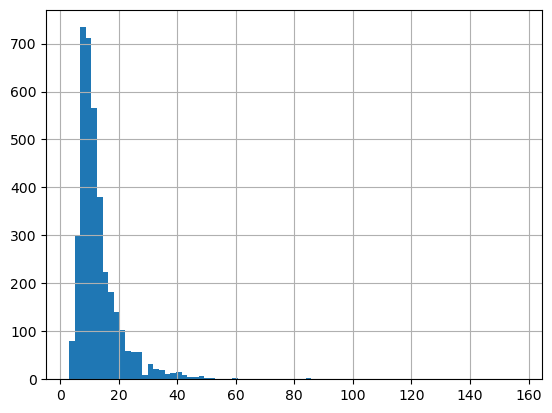

In [29]:
p2rank_pockets.nres.hist(bins=80)

##### Big pockets

In [78]:
v, colors, sites_colors = view_p2rank_pocket(*"5in4	pocket1".split())
v

Viz(bg_color='#F7F7F7', color_data={'data': [{'color': 'white'}], 'nonSelectedColor': None, 'keepColors': Fals…

In [79]:
v.color(colors, keep_colors=True, keep_representations=True)
v.color_residues(sites_colors)

The biggest outlier pocket corresponds to an equally big allosteric site.

<br>

In [81]:
v, colors, sites_colors = view_p2rank_pocket(*"6vum	pocket1".split())
v

Viz(bg_color='#F7F7F7', color_data={'data': [{'color': 'white'}], 'nonSelectedColor': None, 'keepColors': Fals…

In [82]:
v.color(colors, keep_colors=True, keep_representations=True)
v.color_residues(sites_colors)

The pocket is simply very big.

<br>

##### Small pockets

In [83]:
v, colors, sites_colors = view_p2rank_pocket(*"1qw7	pocket4".split())
v

Viz(bg_color='#F7F7F7', color_data={'data': [{'color': 'white'}], 'nonSelectedColor': None, 'keepColors': Fals…

In [84]:
v.color(colors, keep_colors=True, keep_representations=True)
v.color_residues(sites_colors)

Very small pocket.

<br>

#### Outliers

Further than 3 STDs.

<Axes: >

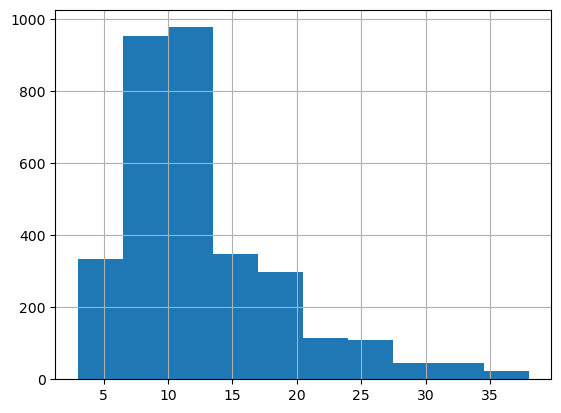

In [85]:
import numpy as np

mean = p2rank_pockets["nres"].mean()
std = p2rank_pockets["nres"].std()
filt = p2rank_pockets[np.abs(p2rank_pockets["nres"] - mean) / std < 3]
filt.nres.hist()

In [86]:
filt.sort_values("nres")

pdb    pocket  nres  site_in_pocket  pocket_in_site
1551  7c7q  pocket24     3        0.000000        0.000000
3175  8dwg   pocket4     3        0.000000        0.000000
2921  1qw7   pocket4     3        0.000000        0.000000
589   7mew  pocket12     3        0.000000        0.000000
2382  6zod  pocket20     3        0.040000        0.333333
...    ...       ...   ...             ...             ...
1266  6jta   pocket3    38        0.208333        0.131579
2734  7mi6   pocket3    38        0.000000        0.000000
2292  1ecb   pocket1    38        0.640000        0.421053
794   4bxc   pocket2    38        0.034483        0.026316
2930  6brh   pocket1    38        0.000000        0.000000

[3246 rows x 5 columns]

### Labelling

In [87]:
p2rank_pockets.loc[
    p2rank_pockets.loc[
        lambda x: x["site_in_pocket"] >= 0.65
    ].index, 
    "label"
] = 1
p2rank_pockets["label"] = p2rank_pockets["label"].fillna(0).astype(int)

p2rank_pockets

pdb   pocket  nres  site_in_pocket  pocket_in_site  label
0     6ta3  pocket1    69        0.000000        0.000000      0
1     6ta3  pocket2    44        0.111111        0.068182      0
2     6ta3  pocket3    52        0.777778        0.403846      1
3     6ta3  pocket4    15        0.000000        0.000000      0
4     6ta3  pocket5    17        0.000000        0.000000      0
...    ...      ...   ...             ...             ...    ...
3299  3d2p  pocket2    17        0.521739        0.705882      0
3300  3d2p  pocket3    15        0.000000        0.000000      0
3301  3d2p  pocket4    11        0.000000        0.000000      0
3302  3d2p  pocket5     8        0.000000        0.000000      0
3303  3d2p  pocket6     7        0.086957        0.285714      0

[3304 rows x 6 columns]

##### No positive-labelled pockets

In [88]:
[pdb for pdb, ps in p2rank_pockets.groupby("pdb") if ps.label.sum() == 0]

['1bo5',
 '1dku',
 '1ecb',
 '1fap',
 '1fx2',
 '1h78',
 '1hak',
 '1i1q',
 '1jlr',
 '1msv',
 '1nh8',
 '1njj',
 '1o0s',
 '1og0',
 '1owb',
 '1peo',
 '1q43',
 '1qw7',
 '1raf',
 '1rd4',
 '1t5a',
 '1tjp',
 '1um8',
 '1uxq',
 '1vea',
 '1vm1',
 '1vst',
 '1w0f',
 '1w25',
 '1w96',
 '1ygc',
 '2b08',
 '2be9',
 '2bty',
 '2bxg',
 '2cdq',
 '2csm',
 '2dz9',
 '2fhy',
 '2i80',
 '2j0x',
 '2jfn',
 '2jfz',
 '2k31',
 '2o8e',
 '2onb',
 '2p5m',
 '2p9g',
 '2poc',
 '2q5o',
 '2qmx',
 '2rde',
 '2vd3',
 '2vd4',
 '2vk1',
 '2xje',
 '2y0p',
 '2ylq',
 '2zb2',
 '3ath',
 '3auy',
 '3blw',
 '3c1n',
 '3cmu',
 '3d2p',
 '3dc2',
 '3etl',
 '3f9n',
 '3fhz',
 '3fud',
 '3fzy',
 '3hl8',
 '3ho8',
 '3hv8',
 '3i0s',
 '3kh5',
 '3kq7',
 '3l76',
 '3la2',
 '3mks',
 '3nwy',
 '3otu',
 '3pjg',
 '3qku',
 '3rhw',
 '3s8b',
 '3smq',
 '3tho',
 '3tuv',
 '3u18',
 '3uqd',
 '3wgg',
 '3x1m',
 '3zkr',
 '3zm9',
 '4avc',
 '4b6e',
 '4bo1',
 '4bqh',
 '4bxc',
 '4c8b',
 '4coj',
 '4dn0',
 '4ejl',
 '4g9c',
 '4gqq',
 '4jn4',
 '4kzt',
 '4lrl',
 '4mdk',
 '4nir',
 

In [89]:
p2rank_dropped = set(p2rank_pockets.pdb.unique()) - set(p2rank_pockets.loc[pockets.label == 1].pdb.unique())

print("Total initial PDBs, final PDBs, dropped PDBs, % of PDBs dropped, and list of dropped PDBs")
len(p2rank_pockets.pdb.unique()), len(p2rank_pockets.loc[p2rank_pockets.label == 1].pdb.unique()), len(p2rank_dropped), len(p2rank_dropped)/len(p2rank_pockets.pdb.unique()), p2rank_dropped

Total initial PDBs, final PDBs, dropped PDBs, % of PDBs dropped, and list of dropped PDBs


(427,
 149,
 315,
 0.7377049180327869,
 {'1bj4',
  '1ecb',
  '1egy',
  '1fap',
  '1h78',
  '1h9g',
  '1hak',
  '1hkb',
  '1i6k',
  '1jlr',
  '1mc0',
  '1msv',
  '1ne7',
  '1nh8',
  '1njj',
  '1o0s',
  '1opl',
  '1owb',
  '1q43',
  '1qqb',
  '1qw7',
  '1raf',
  '1rd4',
  '1tjp',
  '1um8',
  '1uxq',
  '1vea',
  '1vm1',
  '1vst',
  '1w0f',
  '1w96',
  '1ygc',
  '1zxm',
  '2b08',
  '2be9',
  '2bty',
  '2bu6',
  '2bxg',
  '2cdq',
  '2csm',
  '2dz9',
  '2fhy',
  '2fqq',
  '2ha2',
  '2i80',
  '2jfn',
  '2jfz',
  '2ldb',
  '2nw8',
  '2o8e',
  '2onb',
  '2p5m',
  '2p9g',
  '2poc',
  '2qei',
  '2qmx',
  '2rde',
  '2vd3',
  '2vd4',
  '2vvt',
  '2y0p',
  '2ylq',
  '2zv2',
  '3ath',
  '3auy',
  '3c1n',
  '3cev',
  '3d2e',
  '3d2p',
  '3dba',
  '3dc2',
  '3e5u',
  '3edc',
  '3etl',
  '3f6g',
  '3f9n',
  '3fhz',
  '3fud',
  '3fzy',
  '3gnw',
  '3ho6',
  '3hv8',
  '3i0s',
  '3i59',
  '3kcc',
  '3kh5',
  '3kjn',
  '3l76',
  '3la2',
  '3mwb',
  '3nqs',
  '3nwy',
  '3otu',
  '3pjg',
  '3qku',
  '3smq',
 

In [90]:
# Total initial pockets, final pockets, positive pockets
len(p2rank_pockets), len(p2rank_pockets.query(f"pdb not in {list(p2rank_dropped)}")), sum(p2rank_pockets.label == 1)

(3304, 1467, 159)

P2Rank failed to detect pockets at all for some PDBs, and furthermore fails to detect at least one considerably overlapping pocket with the allosteric site(s) for ~74% of PDBs.

<br>

In [91]:
p2rank_pockets.query(f"pdb not in {list(p2rank_dropped)}").to_pickle(f"{p2rank_path}/pockets.pkl")

# Conclusion

Pockets identified by FPocket with the original paper parameters will be used.